# Importing datasets from Data_prep.ipynb

In [1]:
# Importing modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import opendatasets as od

Setting up datasets

In [2]:
air_and_water = pd.read_csv('https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/main/cities_air_quality_water_pollution2021.csv')

gasses = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv',
                     usecols=['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
       'other_industry_co2', 'primary_energy_consumption',
       'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2',
       'trade_co2_share'])# Removed some columns that I doubt would be of use, meanings at https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv

air = pd.read_excel('https://cdn.who.int/media/docs/default-source/air-pollution-documents/air-quality-and-health/who_aap_2021_v9_11august2022.xlsx?sfvrsn=9035996c_3',
                    storage_options={'User-Agent': 'Mozilla/5.0'}, sheet_name='AAP_2022_city_v9',
                    usecols=['ISO3', 'WHO Country Name', 'City or Locality', 'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
                             'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)', 'Version of the database'])

development = pd.read_csv('https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv',
                          storage_options={'User-Agent': 'Mozilla/5.0'})# This has 1008 features so were going to have to figure out what to use and what not

# dataset_url = 'https://public.opendatasoft.com/explore/dataset/geonames-all-cities-with-a-population-1000/download/?format=csv&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B'
# od.download(dataset_url)# This one takes a while

populations = pd.read_csv('./geonames-all-cities-with-a-population-1000.csv', delimiter=';',
                          usecols=['Name', 'ASCII Name', 'Country name EN', 'Population', 'Modification date'])

# Collecting each dataset, seeing what they provide

In [3]:
datasets = {
    'air_and_water' : air_and_water,
    'gasses' : gasses,
    'air' : air,
    'development' : development,
    'populations' : populations
}

    
for name, dataset in datasets.items( ):
    stats = dataset.describe( )
        
    columns = stats.columns
    stats.loc[ 'std var (%)' ] = round( stats.loc[ 'std' ] / stats.loc[ 'mean' ] * 100, 4 )
    print( name )
    display( dataset )
    display( stats )

air_and_water


City                 "Region"                    "Country"  \
0        New York City               "New York"   "United States of America"   
1     Washington, D.C.   "District of Columbia"   "United States of America"   
2        San Francisco             "California"   "United States of America"   
3               Berlin                       ""                    "Germany"   
4          Los Angeles             "California"   "United States of America"   
...                ...                      ...                          ...   
3958             Yanbu        "Medina Province"               "Saudi Arabia"   
3959           Cordoba              "Andalusia"                      "Spain"   
3960               Vic              "Catalonia"                      "Spain"   
3961           Segovia       "Castile and Leon"                      "Spain"   
3962       Zamora city       "Castile and Leon"                      "Spain"   

       "AirQuality"   "WaterPollution"  
0         46.816038          49.504950  
1         66.129032          49.107143  
2         60.514019          43.000000  
3         62.364130          28.612717  
4         36.621622          61.299435  
...             ...                ...  
3958       0.000000          50.000000  
3959      85.714286           8.333333  
3960     100.000000           0.000000  
3961     100.000000           0.000000  
3962     100.000000          50.000000  

[3963 rows x 5 columns]

"AirQuality"   "WaterPollution"
count          3963.000000        3963.000000
mean             62.253452          44.635372
std              30.944753          25.663910
min               0.000000           0.000000
25%              37.686567          25.000000
50%              69.444444          50.000000
75%              87.500000          57.719393
max             100.000000         100.000000
std var (%)      49.707700          57.496800

gasses


country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3767956.0           NaN         NaN   
2      Afghanistan  1852      AFG   3783940.0           NaN         NaN   
3      Afghanistan  1853      AFG   3800954.0           NaN         NaN   
4      Afghanistan  1854      AFG   3818038.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
48053     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
48054     Zimbabwe  2019      ZWE  15354606.0           NaN       0.473   
48055     Zimbabwe  2020      ZWE  15669663.0           NaN       0.496   
48056     Zimbabwe  2021      ZWE  15993525.0           NaN       0.531   
48057     Zimbabwe  2022      ZWE  16320539.0           NaN       0.531   

       cement_co2_per_capita     co2  co2_including_luc  \
0                        NaN     NaN                NaN   
1                        NaN     NaN                NaN   
2                        NaN     NaN                NaN   
3                        NaN     NaN                NaN   
4                        NaN     NaN                NaN   
...                      ...     ...                ...   
48053                  0.037  10.715             19.423   
48054                  0.031   9.775             17.854   
48055                  0.032   7.850             15.459   
48056                  0.033   8.396             15.513   
48057                  0.033   8.856             15.580   

       co2_including_luc_growth_abs  ...  nitrous_oxide_per_capita  oil_co2  \
0                               NaN  ...                       NaN      NaN   
1                               NaN  ...                       NaN      NaN   
2                               NaN  ...                       NaN      NaN   
3                               NaN  ...                       NaN      NaN   
4                               NaN  ...                       NaN      NaN   
...                             ...  ...                       ...      ...   
48053                         0.534  ...                     0.353    4.060   
48054                        -1.569  ...                     0.344    3.731   
48055                        -2.396  ...                     0.301    3.045   
48056                         0.054  ...                       NaN    3.317   
48057                         0.067  ...                       NaN    3.298   

       oil_co2_per_capita  other_co2_per_capita  other_industry_co2  \
0                     NaN                   NaN                 NaN   
1                     NaN                   NaN                 NaN   
2                     NaN                   NaN                 NaN   
3                     NaN                   NaN                 NaN   
4                     NaN                   NaN                 NaN   
...                   ...                   ...                 ...   
48053               0.270                   NaN                 NaN   
48054               0.243                   NaN                 NaN   
48055               0.194                   NaN                 NaN   
48056               0.207                   NaN                 NaN   
48057               0.202                   NaN                 NaN   

       primary_energy_consumption  total_ghg  total_ghg_excluding_lucf  \
0                             NaN        NaN                       NaN   
1                             NaN        NaN                       NaN   
2                             NaN        NaN                       NaN   
3                             NaN        NaN                       NaN   
4                             NaN        NaN                       NaN   
...                           ...        ...                       ...   
48053                      51.809     116.76                     29.37   
48054  

year    population           gdp    cement_co2  \
count        48058.000000  3.949500e+04  1.456400e+04  23764.000000   
mean          1926.842565  6.083223e+07  2.677586e+11      9.109400   
std             59.414846  3.285867e+08  2.103151e+12     66.463548   
min           1750.000000  2.220000e+02  4.998000e+07      0.000000   
25%           1883.000000  3.464375e+05  7.516679e+09      0.000000   
50%           1930.000000  2.456362e+06  2.597999e+10      0.029000   
75%           1976.000000  1.008038e+07  1.132942e+11      0.834000   
max           2022.000000  7.975105e+09  1.136302e+14   1692.404000   
std var (%)      3.083500  5.401524e+02  7.854654e+02    729.615000   

             cement_co2_per_capita           co2  co2_including_luc  \
count                 22017.000000  30308.000000       23320.000000   
mean                      0.066798    391.272161         534.225708   
std                       0.125367   1855.824655        2164.644277   
min                       0.000000      0.000000        -187.847000   
25%                       0.000000      0.183000           5.950750   
50%                       0.008000      3.856000          27.777000   
75%                       0.093000     47.277250         124.373750   
max                       2.574000  37149.785000       41637.617000   
std var (%)             187.681600    474.305300         405.192800   

             co2_including_luc_growth_abs  co2_including_luc_growth_prct  \
count                        23030.000000                   23313.000000   
mean                             7.445587                       9.863664   
std                             97.593192                     583.851775   
min                          -2334.695000                  -12331.075000   
25%                             -0.752750                      -4.058000   
50%                              0.071000                       0.981000   
75%                              2.568500                       5.723000   
max                           2340.859000                   77926.773000   
std var (%)                   1310.752200                    5919.217900   

             co2_including_luc_per_capita  ...  nitrous_oxide_per_capita  \
count                        23320.000000  ...               6355.000000   
mean                             7.143287  ...                  0.570777   
std                             10.175788  ...                  0.747627   
min                            -10.545000  ...                  0.000000   
25%                              1.903000  ...                  0.209000   
50%                              4.458000  ...                  0.359000   
75%                              8.952250  ...                  0.582500   
max                            367.946000  ...                  7.127000   
std var (%)                    142.452500  ...                130.984000   

                  oil_co2  oil_co2_per_capita  other_co2_per_capita  \
count        25111.000000        24380.000000           2447.000000   
mean           112.920681            2.173166              0.073191   
std            629.451112           14.073286              0.057262   
min              0.000000            0.000000              0.000000   
25%              0.084000            0.042000              0.025000   
50%              1.323000            0.382000              0.066000   
75%             13.916000            1.942000              0.102000   
max          12377.949000          771.886000              0.348000   
std var (%)    557.427700          647.593700             78.235700   

             other_industry_co2  primary_energy_consumption     total_ghg  \
count               2593.000000                10103.000000   6354.000000   
mean                  17.499371                 2435.045751    790.430981   
std                   41.335944                11029.856876   3610.534250   
min                    0.000000                    0.00000

air


ISO3 WHO Country Name City or Locality  Measurement Year  PM2.5 (μg/m3)  \
0      AFG      Afghanistan            Kabul              2019         119.77   
1      ALB          Albania           Durres              2015            NaN   
2      ALB          Albania           Durres              2016          14.32   
3      ALB          Albania          Elbasan              2015            NaN   
4      ALB          Albania          Elbasan              2016            NaN   
...    ...              ...              ...               ...            ...   
32186  ZAF     South Africa       West Coast              2015           7.47   
32187  ZAF     South Africa       West Coast              2016           8.42   
32188  ZAF     South Africa       West Coast              2017           6.83   
32189  ZAF     South Africa       West Coast              2018           6.10   
32190  ZAF     South Africa        West Rand              2016            NaN   

       PM10 (μg/m3)  NO2 (μg/m3)  PM25 temporal coverage (%)  \
0               NaN          NaN                        18.0   
1             17.65        26.63                         NaN   
2             24.56        24.78                         NaN   
3               NaN        23.96                         NaN   
4               NaN        26.26                         NaN   
...             ...          ...                         ...   
32186         24.64         7.64                        75.0   
32187         33.28         7.27                        75.0   
32188         20.49         8.72                        75.0   
32189         17.99         7.15                        75.0   
32190           NaN        17.85                         NaN   

       PM10 temporal coverage (%)  NO2 temporal coverage (%)  \
0                             NaN                        NaN   
1                             NaN                  83.961187   
2                             NaN                  87.932605   
3                             NaN                  97.853881   
4                             NaN                  96.049636   
...                           ...                        ...   
32186                        75.0                  75.000000   
32187                        75.0                  75.000000   
32188                        75.0                  75.000000   
32189                        75.0                  75.000000   
32190                         NaN                  75.000000   

       Version of the database  
0                         2022  
1                         2022  
2                         2022  
3                         2022  
4                         2022  
...                        ...  
32186                     2022  
32187                     2022  
32188                     2022  
32189                     2022  
32190                     2022  

[32191 rows x 11 columns]

Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)   NO2 (μg/m3)  \
count            32191.000000   15048.000000  21109.000000  22200.000000   
mean              2015.579354      22.920320     30.533252     20.619336   
std                  2.752654      17.925906     29.312756     12.133388   
min               2000.000000       0.010000      1.040000      0.000000   
25%               2014.000000      10.350000     16.980000     12.000000   
50%               2016.000000      16.000000     22.000000     18.800000   
75%               2018.000000      31.000000     31.300000     27.160000   
max               2021.000000     191.900000    540.000000    210.680000   
std var (%)          0.136600      78.209700     96.002700     58.844700   

             PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
count                       7275.000000                 5381.000000   
mean                          90.794096                   90.583500   
std                           14.872681                   13.816311   
min                            0.000000                    2.568493   
25%                           88.595890                   87.945205   
50%                           97.000000                   96.039000   
75%                           99.000000                   98.938000   
max                          100.000000                  100.000000   
std var (%)                   16.380700                   15.252600   

             NO2 temporal coverage (%)  Version of the database  
count                     19890.000000             32191.000000  
mean                         93.696804              2021.744214  
std                          10.451751                 1.051897  
min                           1.923077              2016.000000  
25%                          93.207763              2022.000000  
50%                          96.369863              2022.000000  
75%                          98.926941              2022.000000  
max                         100.000000              2022.000000  
std var (%)                  11.154900                 0.052000

development


iso3                          country    hdicode region  \
0          AFG                      Afghanistan        Low     SA   
1          AGO                           Angola     Medium    SSA   
2          ALB                          Albania       High    ECA   
3          AND                          Andorra  Very High    NaN   
4          ARE             United Arab Emirates  Very High     AS   
..         ...                              ...        ...    ...   
201    ZZG.ECA          Europe and Central Asia        NaN    NaN   
202    ZZH.LAC  Latin America and the Caribbean        NaN    NaN   
203     ZZI.SA                       South Asia        NaN    NaN   
204    ZZJ.SSA               Sub-Saharan Africa        NaN    NaN   
205  ZZK.WORLD                            World        NaN    NaN   

     hdi_rank_2021  hdi_1990  hdi_1991  hdi_1992  hdi_1993  hdi_1994  ...  \
0            180.0     0.273     0.279     0.287     0.297     0.292  ...   
1            148.0       NaN       NaN       NaN       NaN       NaN  ...   
2             67.0     0.647     0.629     0.614     0.617     0.624  ...   
3             40.0       NaN       NaN       NaN       NaN       NaN  ...   
4             26.0     0.728     0.739     0.742     0.748     0.755  ...   
..             ...       ...       ...       ...       ...       ...  ...   
201            NaN     0.664     0.661     0.654     0.652     0.647  ...   
202            NaN     0.633     0.638     0.643     0.648     0.654  ...   
203            NaN     0.442     0.447     0.453     0.457     0.462  ...   
204            NaN     0.407     0.410     0.410     0.411     0.413  ...   
205            NaN     0.601     0.604     0.607     0.610     0.614  ...   

       mf_2012    mf_2013    mf_2014    mf_2015    mf_2016    mf_2017  \
0     1.860000   1.880000   1.660000   1.620000   1.660000   1.410000   
1     4.090000   4.530000   3.970000   3.590000   2.790000   2.640000   
2    12.440000  11.490000  13.140000  12.610000  14.390000  14.460000   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4    49.560000  49.680000  55.490000  59.760000  64.950000  75.610000   
..         ...        ...        ...        ...        ...        ...   
201  13.107171  14.172082  14.189127  14.523162  13.791770  13.618078   
202  14.114108  14.493145  14.080904  14.146026  13.325144  13.604555   
203   4.699407   4.584935   4.486500   4.610546   4.624886   4.740263   
204   3.437760   3.530479   3.491150   3.494860   3.415511   3.256156   
205  12.186601  12.474065  12.520563  12.372667  12.277707  12.277878   

       mf_2018    mf_2019    mf_2020    mf_2021  
0     1.320000   1.380000   1.380000   1.380000  
1     2.280000   2.180000   2.180000   2.180000  
2    12.850000  12.960000  12.960000  12.960000  
3          NaN        NaN        NaN        NaN  
4    65.970000  68.950000  68.950000  68.950000  
..         ...        ...        ...        ...  
201  13.914030  14.087293  14.091826  14.096719  
202  13.151315  13.296195  13.290914  13.284745  
203   5.000024   5.110230   5.106447   5.102134  
204   3.145930   3.151076   3.146092   3.140740  
205  12.220286  12.375236  12.325166  12.271920  

[206 rows x 1008 columns]

hdi_rank_2021    hdi_1990    hdi_1991    hdi_1992    hdi_1993  \
count           191.000000  152.000000  152.000000  152.000000  152.000000   
mean             95.811518    0.595112    0.597862    0.600493    0.604474   
std              55.307333    0.161918    0.161921    0.162193    0.163122   
min               1.000000    0.216000    0.218000    0.222000    0.227000   
25%              48.500000    0.477750    0.477000    0.475250    0.474250   
50%              96.000000    0.621500    0.623500    0.622000    0.624000   
75%             143.500000    0.725500    0.727000    0.723750    0.724250   
max             191.000000    0.872000    0.873000    0.878000    0.880000   
std var (%)      57.725100   27.208000   27.083300   27.010000   26.985800   

               hdi_1994    hdi_1995    hdi_1996    hdi_1997    hdi_1998  ...  \
count        152.000000  163.000000  163.000000  163.000000  163.000000  ...   
mean           0.609329    0.613908    0.619663    0.624975    0.630417  ...   
std            0.163818    0.162789    0.163461    0.164299    0.165177  ...   
min            0.232000    0.238000    0.243000    0.248000    0.256000  ...   
25%            0.476500    0.480500    0.488500    0.490000    0.492000  ...   
50%            0.623500    0.642000    0.650000    0.651000    0.657000  ...   
75%            0.733750    0.737000    0.743000    0.752500    0.759000  ...   
max            0.884000    0.885000    0.887000    0.890000    0.895000  ...   
std var (%)   26.885000   26.516900   26.379100   26.288900   26.201300  ...   

                mf_2012     mf_2013     mf_2014     mf_2015     mf_2016  \
count        168.000000  168.000000  168.000000  168.000000  168.000000   
mean          15.249784   15.385926   15.347629   15.352632   15.342119   
std           14.134572   14.555342   14.363092   14.680340   15.015809   
min            0.430000    0.420000    0.450000    0.560000    0.600000   
25%            4.597500    4.525000    4.452375    4.457500    4.517500   
50%           10.907725   11.272314   10.745000   10.260000   10.590000   
75%           20.345000   20.397500   20.227500   20.187500   19.350000   
max           74.560000   82.970000   81.100000   86.780000   83.510000   
std var (%)   92.687000   94.601700   93.585100   95.621000   97.873100   

                mf_2017     mf_2018     mf_2019     mf_2020     mf_2021  
count        168.000000  168.000000  168.000000  168.000000  168.000000  
mean          15.491780   14.597416   14.776332   14.775408   14.774396  
std           15.333709   13.581871   14.266308   14.266504   14.266706  
min            0.610000    0.500000    0.470000    0.470000    0.470000  
25%            4.575000    4.612500    4.732500    4.732500    4.732500  
50%           10.895000   11.215000   11.030000   11.030000   11.030000  
75%           19.757500   18.432500   17.932500   17.932500   17.932500  
max           88.700000   71.160000   85.700000   85.700000   85.700000  
std var (%)   98.979600   93.043000   96.548400   96.555700   96.563700  

[9 rows x 1004 columns]

populations


Name            ASCII Name         Country name EN  \
0                      Flero                 Flero                   Italy   
1              Finale Emilia         Finale Emilia                   Italy   
2                  Ferentino             Ferentino                   Italy   
3                   Faggiano              Faggiano                   Italy   
4       Fabbriche di Vallico  Fabbriche di Vallico                   Italy   
...                      ...                   ...                     ...   
141179               Rumboci               Rumboci  Bosnia and Herzegovina   
141180                Priboj                Priboj  Bosnia and Herzegovina   
141181               Pazarić               Pazaric  Bosnia and Herzegovina   
141182       Orahovica Donja       Orahovica Donja  Bosnia and Herzegovina   
141183              Obudovac              Obudovac  Bosnia and Herzegovina   

        Population Modification date  
0             7389        2014-04-13  
1             9044        2014-04-13  
2            12539        2014-04-13  
3             3507        2014-04-13  
4              208        2014-05-10  
...            ...               ...  
141179        3854        2018-12-05  
141180        4351        2018-12-05  
141181        4787        2012-05-06  
141182        5612        2012-04-06  
141183        2171        2016-03-10  

[141184 rows x 5 columns]

Population
count        1.411840e+05
mean         2.582924e+04
std          2.333119e+05
min          0.000000e+00
25%          1.284000e+03
50%          2.973500e+03
75%          9.797000e+03
max          2.231547e+07
std var (%)  9.032859e+02

Seeing how big our datasets are

In [4]:
for name, dataset in datasets.items( ):
    print( f'{name} - { len( dataset ) }' )

air_and_water - 3963
gasses - 48058
air - 32191
development - 206
populations - 141184


# Data cleaning

Starting with air quality and water pollution

In [5]:
# Cleaning the column names
# Old: Index(['City', ' "Region"', ' "Country"', ' "AirQuality"', ' "WaterPollution"'],

new_cols = {
    'City' : 'City',
    ' "Region"' : 'Region',
    ' "Country"' : 'Country',
    ' "AirQuality"' : 'AirQuality',
    ' "WaterPollution"' : 'WaterPollution'
}

air_and_water.columns = [ new_cols[ col ] for col in air_and_water.columns ]
print( air_and_water.columns )

Index(['City', 'Region', 'Country', 'AirQuality', 'WaterPollution'], dtype='object')


In [6]:
# Grouping data by country
air_and_water[ 'AirQuality' ] = pd.to_numeric( air_and_water[ 'AirQuality' ] )
air_and_water[ 'WaterPollution' ] = pd.to_numeric( air_and_water[ 'WaterPollution' ] )

air_and_water_country = air_and_water.groupby( 'Country' ).agg(
    {
        'AirQuality' : 'median',
        'WaterPollution' : 'median'
    }
)

# Remove the " from country names
air_and_water_country.index = air_and_water_country.index.str.replace( '"', '' )
print( air_and_water_country.isna( ).sum( ) )

air_and_water_country # Were done cleaning this dataset

AirQuality        0
WaterPollution    0
dtype: int64


AirQuality  WaterPollution
Country                                 
 Afghanistan   31.085526       62.500000
 Albania       58.333333       62.500000
 Algeria       50.000000       50.000000
 Andorra       43.750000       25.000000
 Angola        15.000000       81.250000
...                  ...             ...
 Venezuela     25.000000       95.714286
 Vietnam       50.961538       66.346154
 Yemen         29.166667       83.333333
 Zambia        54.166667       99.038462
 Zimbabwe      44.230769       73.214286

[177 rows x 2 columns]



Also repeat the same process with gasses dataframe

year  count
171  2022    247
71   2021    259
52   2020    259
51   2019    259
50   2018    259
49   2017    259
48   2016    259
47   2015    259
45   2014    259
38   2013    259
44   2012    259
43   2011    259
42   2010    259
41   2009    259
40   2008    259
39   2007    259
53   2006    259
54   2005    259
55   2004    259
56   2003    259
57   2002    259
58   2001    259
59   2000    259
60   1999    259
61   1998    259
62   1997    259
63   1996    259
64   1995    259
65   1994    259
66   1993    259
67   1992    259
31   1991    260
68   1990    259

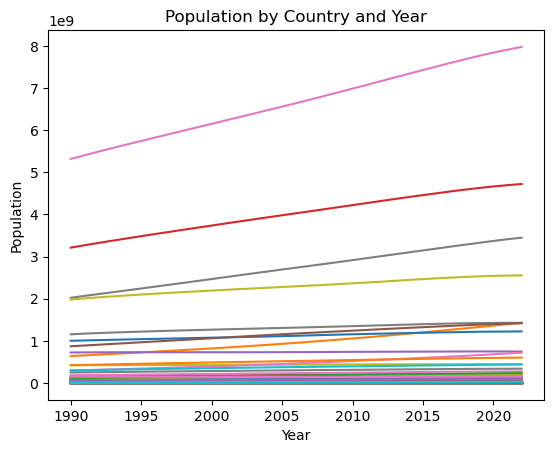

Country  Afghanistan        Africa  Africa (GCP)    Albania     Algeria  \
Year                                                                      
1990      10694804.0  6.381576e+08           0.0  3295073.0  25518074.0   
1991      10745168.0  6.550409e+08           0.0  3302087.0  26133906.0   
1992      12057436.0  6.719318e+08           0.0  3303738.0  26748302.0   
1993      14003764.0  6.891403e+08           0.0  3300715.0  27354326.0   
1994      15455560.0  7.064886e+08           0.0  3294001.0  27937006.0   
1995      16418911.0  7.243320e+08           0.0  3284370.0  28478024.0   
1996      17106600.0  7.427651e+08           0.0  3271336.0  28984640.0   
1997      17788818.0  7.612248e+08           0.0  3253721.0  29476030.0   
1998      18493134.0  7.799083e+08           0.0  3232185.0  29924664.0   
1999      19262854.0  7.990996e+08           0.0  3208265.0  30346086.0   
2000      19542986.0  8.189524e+08           0.0  3182027.0  30774624.0   
2001      19688634.0  8.394641e+08           0.0  3153615.0  31200984.0   
2002      21000258.0  8.606118e+08           0.0  3123554.0  31624700.0   
2003      22645136.0  8.823496e+08           0.0  3092993.0  32055882.0   
2004      23553554.0  9.047816e+08           0.0  3062629.0  32510184.0   
2005      24411196.0  9.278984e+08           0.0  3032636.0  32956690.0   
2006      25442946.0  9.517406e+08           0.0  3003391.0  33435082.0   
2007      25903306.0  9.764617e+08           0.0  2976089.0  33983836.0   
2008      26427204.0  1.001982e+09           0.0  2951690.0  34569592.0   
2009      27385310.0  1.028201e+09           0.0  2930553.0  35196040.0   
2010      28189672.0  1.055234e+09           0.0  2913402.0  35856348.0   
2011      29249156.0  1.082676e+09           0.0  2900660.0  36543548.0   
2012      30466484.0  1.110797e+09           0.0  2892191.0  37260568.0   
2013      31541216.0  1.140181e+09           0.0  2887019.0  38000628.0   
2014      32716214.0  1.170299e+09           0.0  2884100.0  38760168.0   
2015      33753500.0  1.201108e+09           0.0  2882482.0  39543148.0   
2016      34636212.0  1.232112e+09           0.0  2881064.0  40339328.0   
2017      35643420.0  1.263334e+09           0.0  2879361.0  41136548.0   
2018      36686788.0  1.295265e+09           0.0  2877019.0  41927008.0   
2019      37769496.0  1.327701e+09           0.0  2873883.0  42705372.0   
2020      38972236.0  1.360677e+09           0.0  2866850.0  43451668.0   
2021      40099460.0  1.393677e+09           0.0  2854710.0  44177964.0   
2022      41128772.0  1.426737e+09           0.0  2842318.0  44903228.0   

Country  Andorra      Angola  Anguilla  Antarctica  Antigua and Barbuda  ...  \
Year                                                                     ...   
1990     53590.0  11828643.0    8340.0         0.0              63346.0  ...   
1991     55455.0  12228698.0    8638.0         0.0              63653.0  ...   
1992     57305.0  12632509.0    8911.0         0.0              64676.0  ...   
1993     59177.0  13038277.0    9144.0         0.0              65849.0  ...   
1994     61057.0  13462032.0    9381.0         0.0              67091.0  ...   
1995     62944.0  13912258.0    9625.0         0.0              68417.0  ...   
1996     64166.0  14383352.0    9886.0         0.0              69817.0  ...   
1997     64702.0  14871148.0   10152.0         0.0              71233.0  ...   
1998     65204.0  15366866.0   10438.0         0.0              72589.0  ...   
1999     65675.0  15870759.0   10744.0         0.0              73833.0  ...   
2000     66116.0  16394067.0   11071.0         0.0              75070.0  ...   
2001     67841.0  16941584.0   11367.0         0.0              76227.0  ...   
2002     70868.0  17516140.0   11583.0         0.0              77216.0  ...   
2003     73929.0  18124346.0   11761.0         0.0              78095.0  ...   
2004     76950.0  18771128.0   11957.0         0.0              78955.0  ...   
2005     79845

In [7]:
# Check how many unique years there are, were only looking for data after 1990 (hdi dataset low range)
# latest year is 2022 so we het first 2022 - 1990 = 32 entries + 1 = 33
display( gasses[ 'year' ].value_counts( ).reset_index( ).sort_values( by='year', ascending=False ).head( 33 ) )

# 259 countries have 1990-2021 data
# 247 countries have 2022 year data aswell
# lets only use the countries that have data up to 2022


# iso_code isnt needed
gasses.drop( columns=[ 'iso_code' ] )

# Fill NaN's with 0
gasses = gasses.fillna( 0 )

# Visualise the population growth by year for each country, starting from the year 1990 and where there is data until 2022
filtered_gasses = gasses[ ( gasses[ 'year' ] >= 1990 ) & ( gasses[ 'year' ] <= 2022 ) ]
grouped = filtered_gasses.groupby([ 'country', 'year' ])

data = [ ]
for name, group in grouped:
    country, year = name
    population = group[ 'population' ].mean( )
    data.append(( year, country, population ))

populations = pd.DataFrame( data, columns=[ 'Year', 'Country', 'Population' ]).pivot( index='Year', columns='Country', values='Population' )
    
# Show the populations
populations.plot( kind='line' )
plt.title( 'Population by Country and Year' )
plt.xlabel( 'Year' )
plt.ylabel( 'Population' )
plt.legend( ).remove( ) # too big, only want to see generalized data
plt.show()

populations

Generated historical data for gdp, access the dataframe with `gasses_yearly_data["gdp"]`
Generated historical data for cement_co2, access the dataframe with `gasses_yearly_data["cement_co2"]`
Generated historical data for cement_co2_per_capita, access the dataframe with `gasses_yearly_data["cement_co2_per_capita"]`
Generated historical data for co2, access the dataframe with `gasses_yearly_data["co2"]`
Generated historical data for co2_including_luc, access the dataframe with `gasses_yearly_data["co2_including_luc"]`
Generated historical data for co2_including_luc_growth_abs, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_abs"]`
Generated historical data for co2_including_luc_growth_prct, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_prct"]`
Generated historical data for co2_including_luc_per_capita, access the dataframe with `gasses_yearly_data["co2_including_luc_per_capita"]`
Generated historical data for co2_including_luc_per_gdp, a

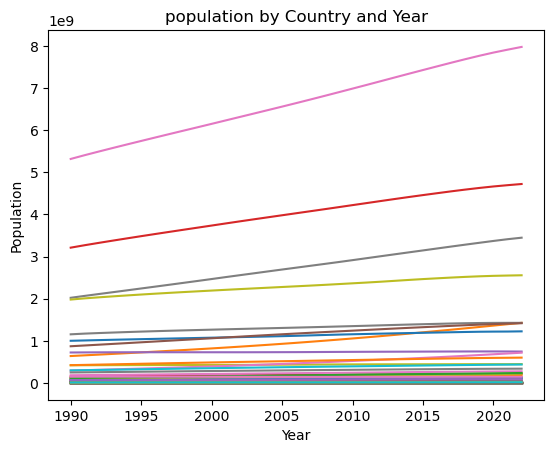

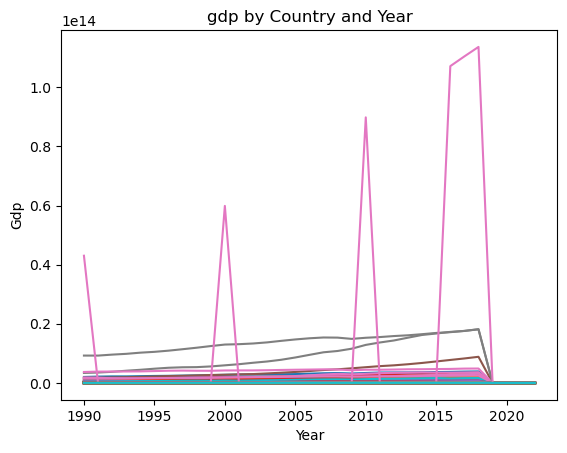

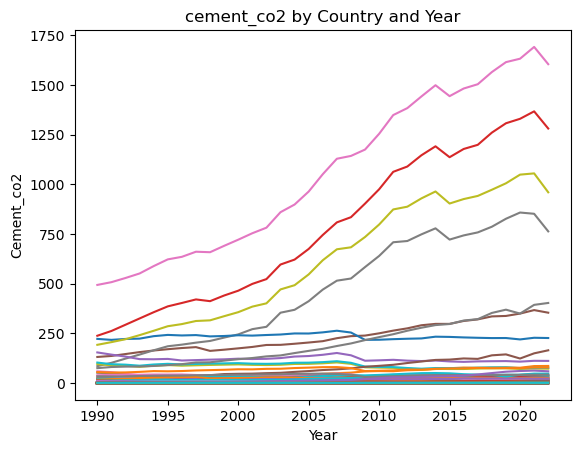

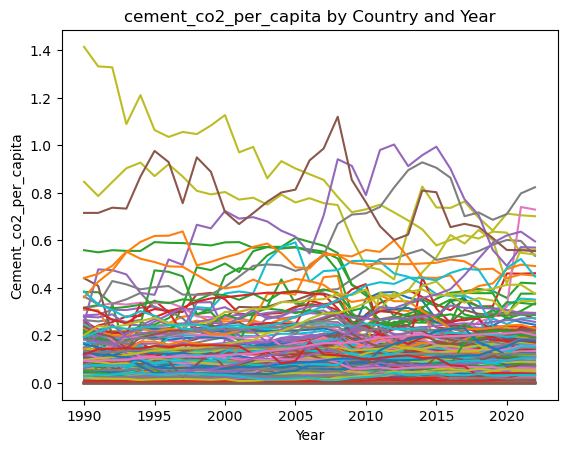

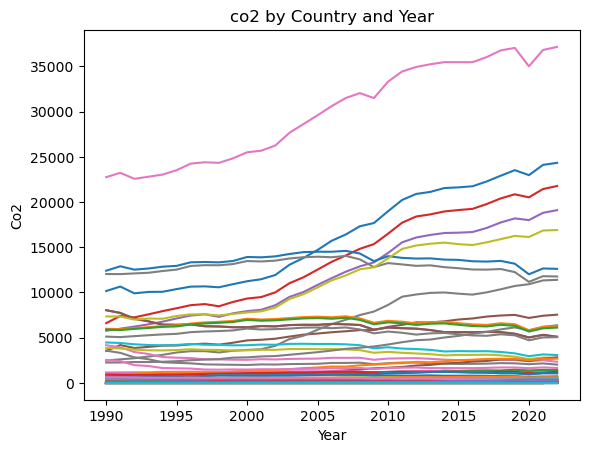

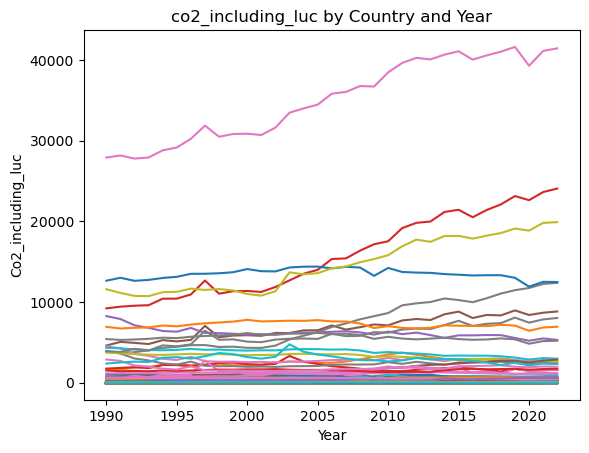

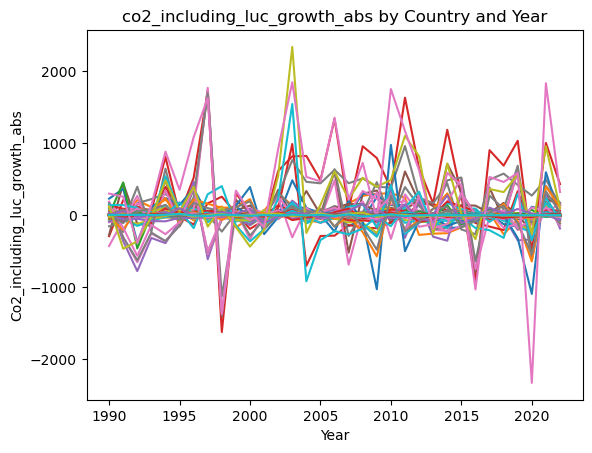

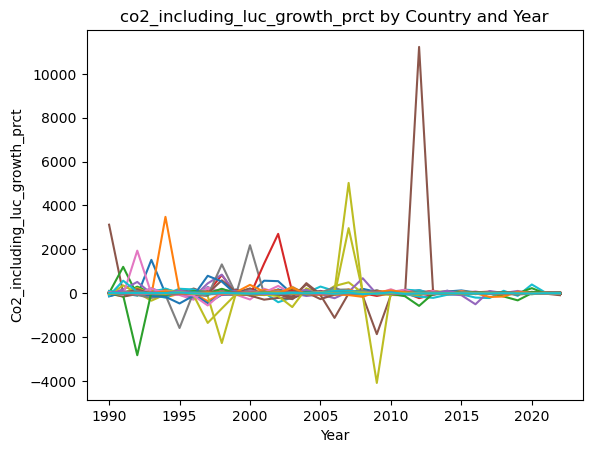

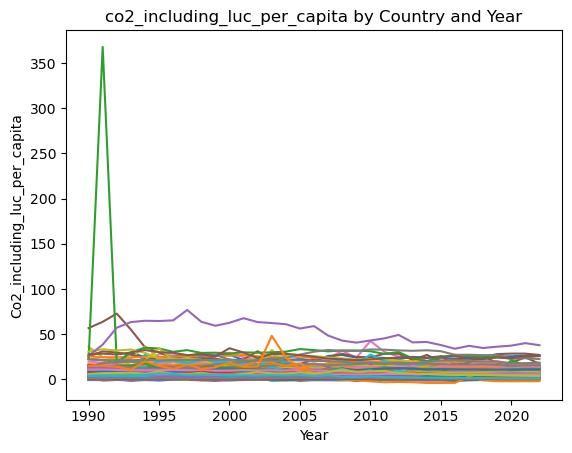

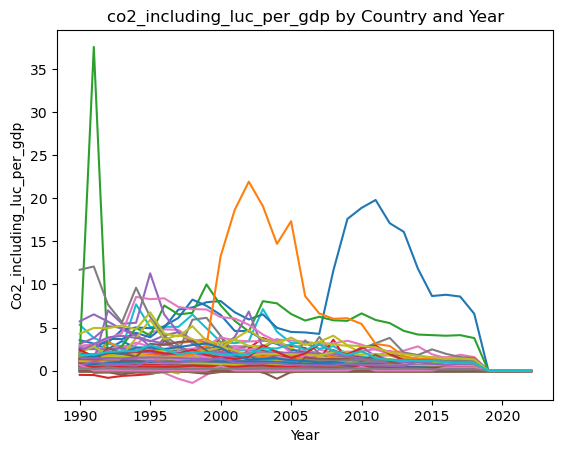

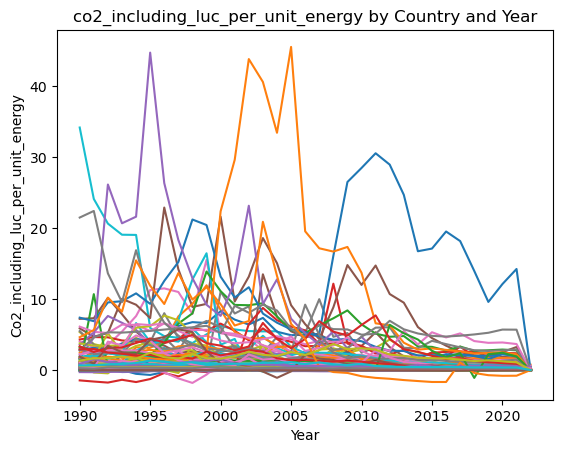

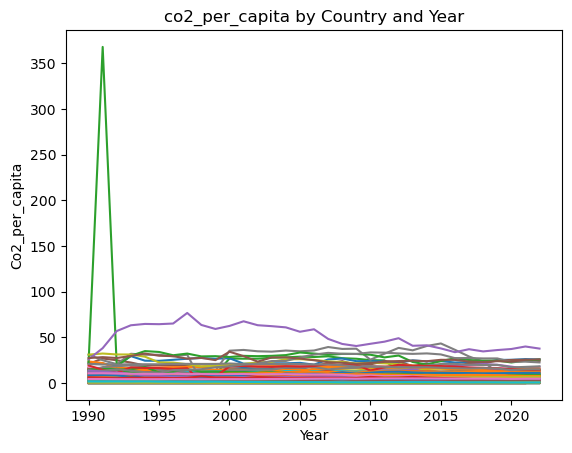

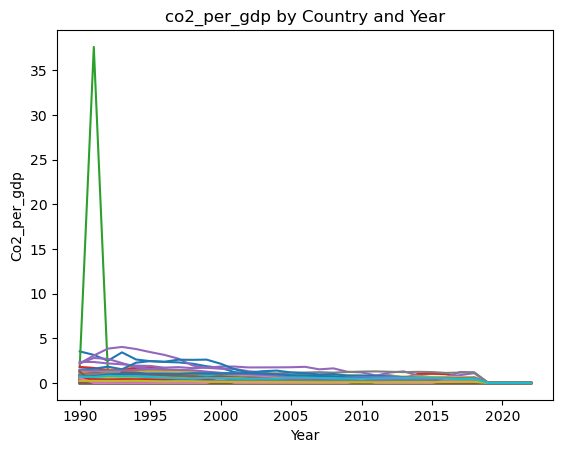

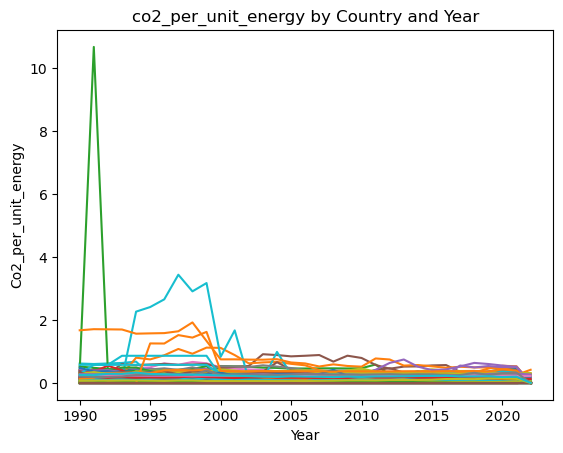

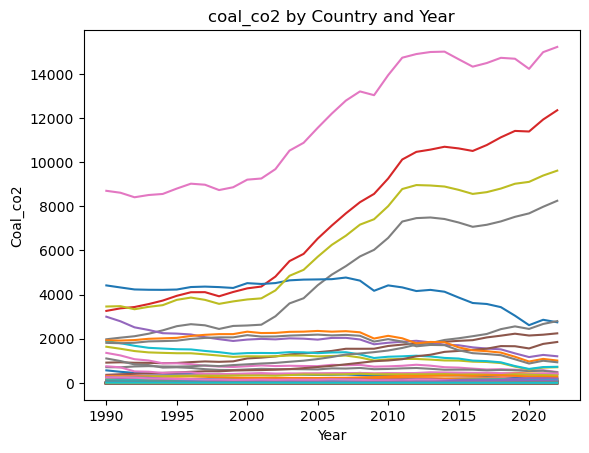

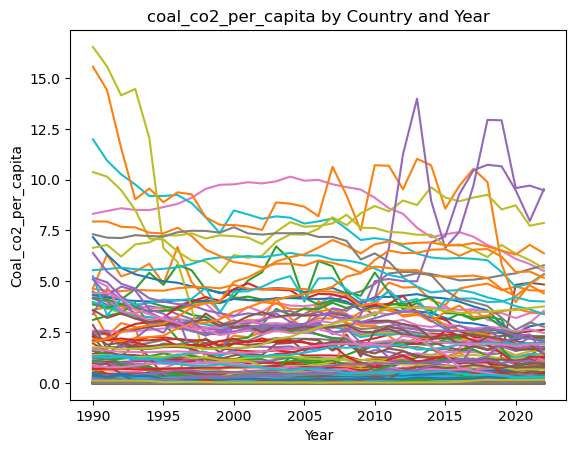

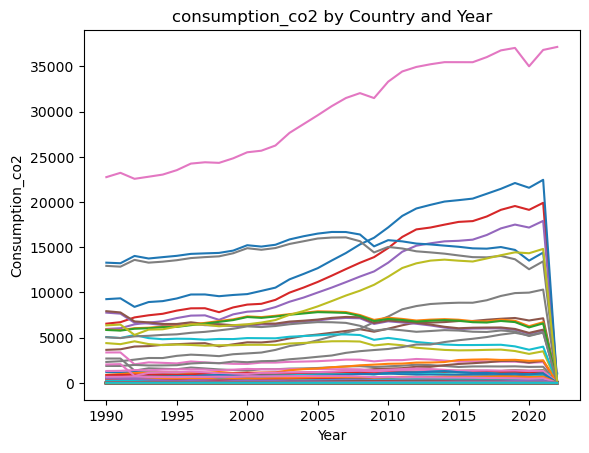

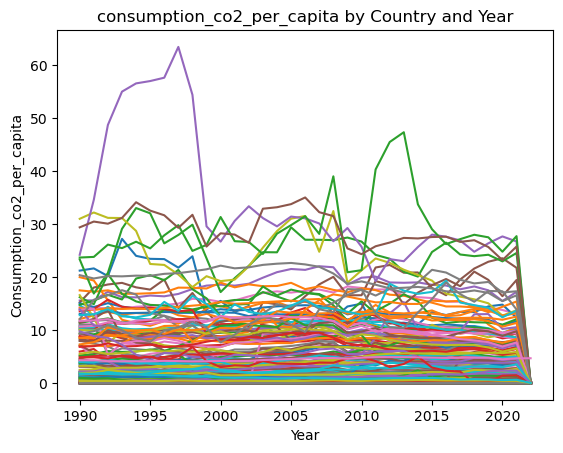

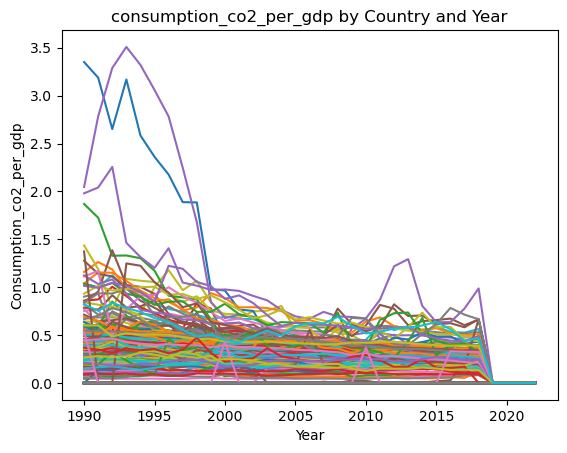

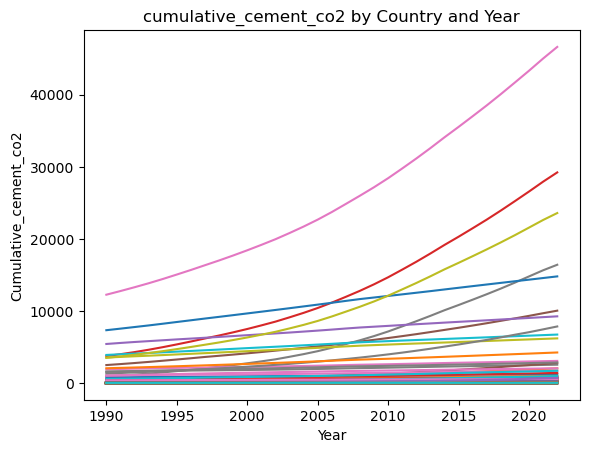

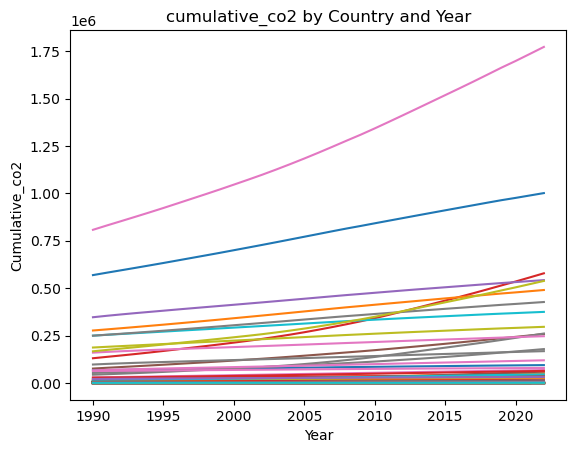

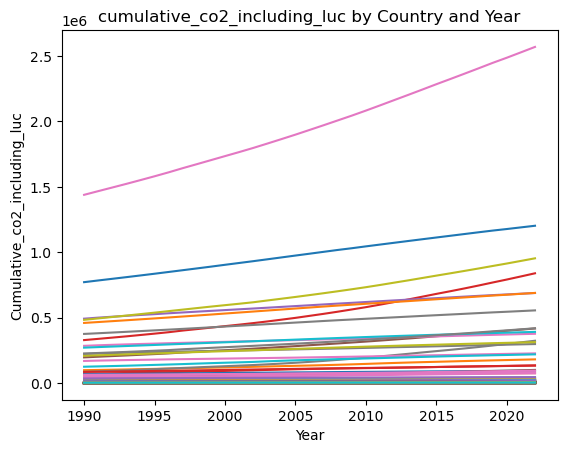

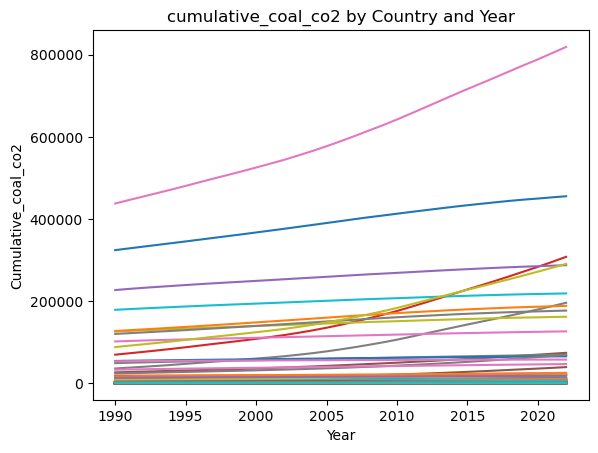

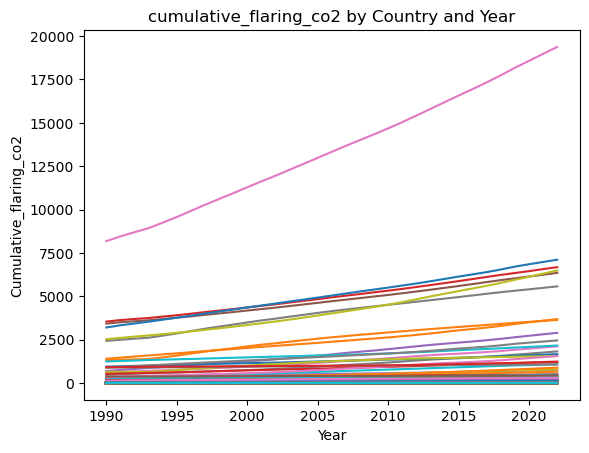

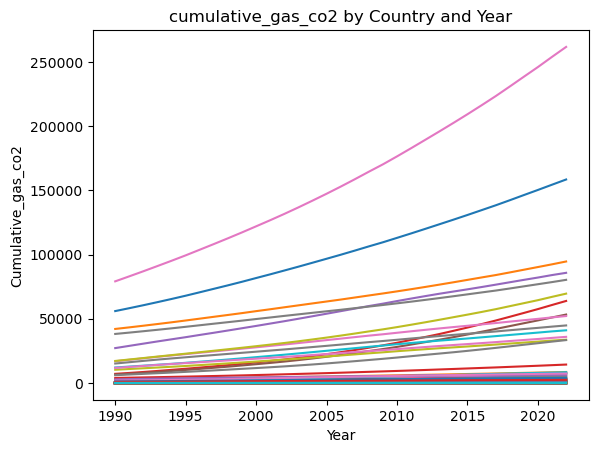

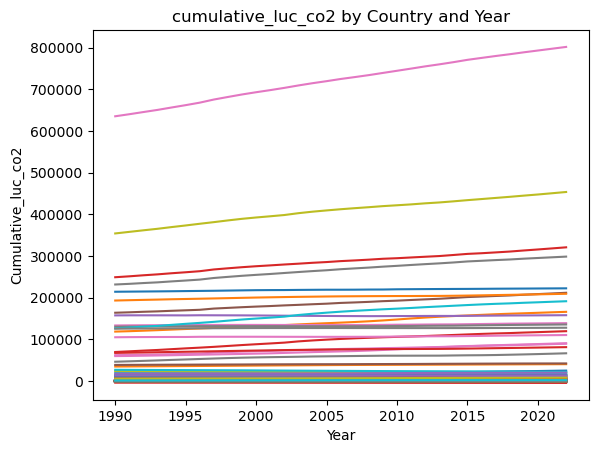

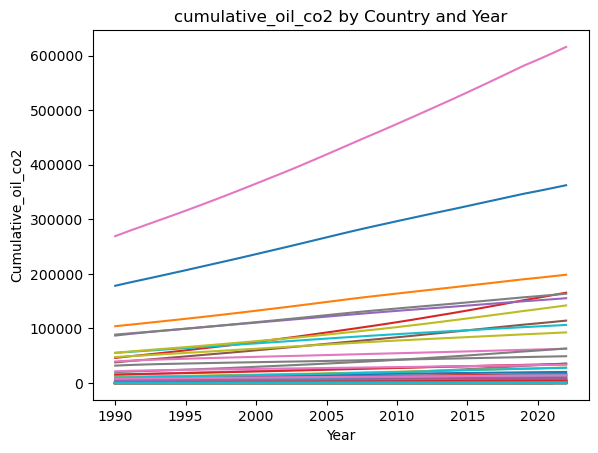

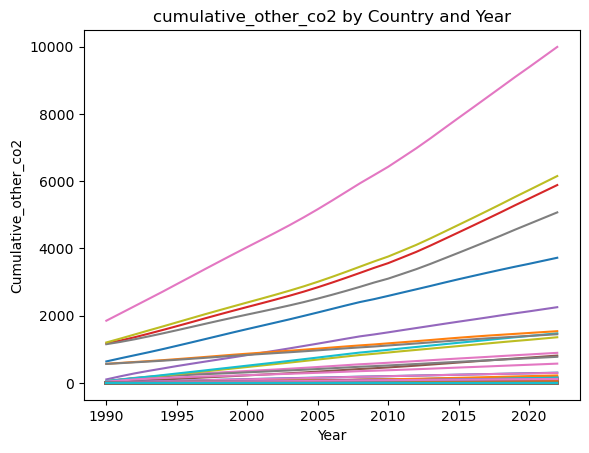

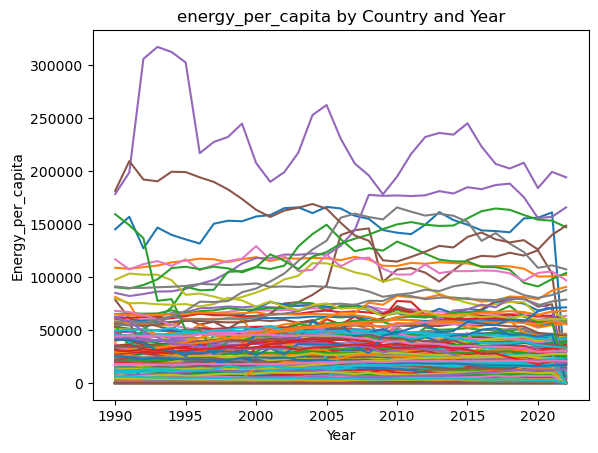

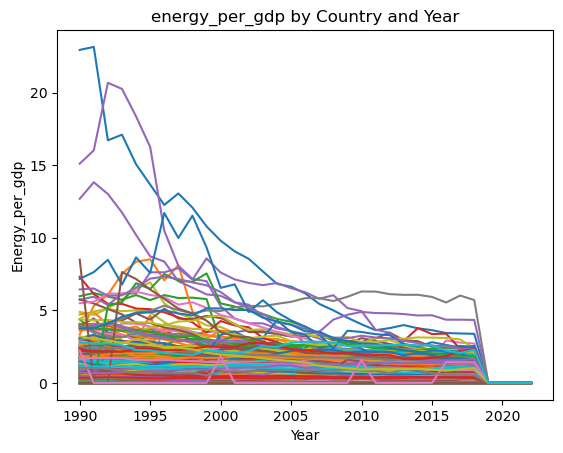

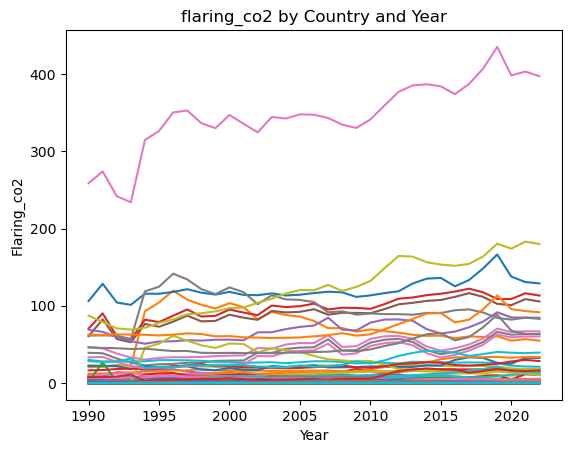

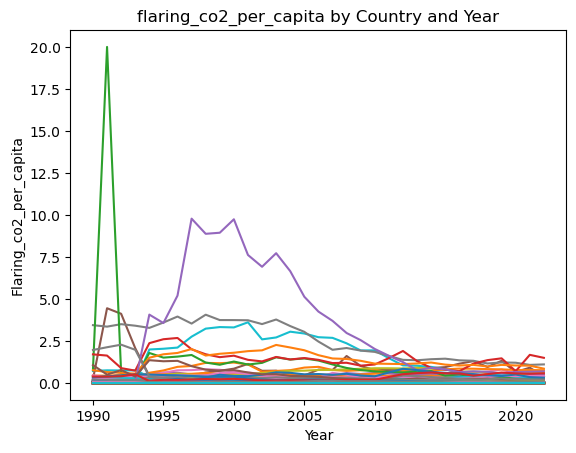

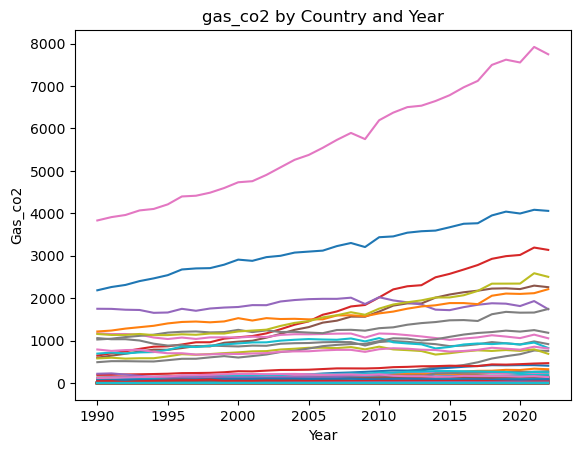

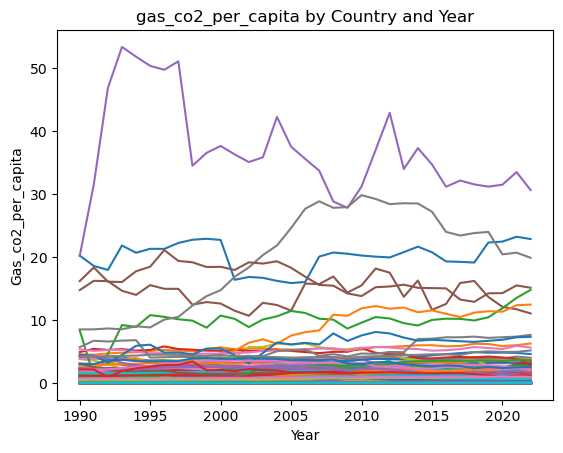

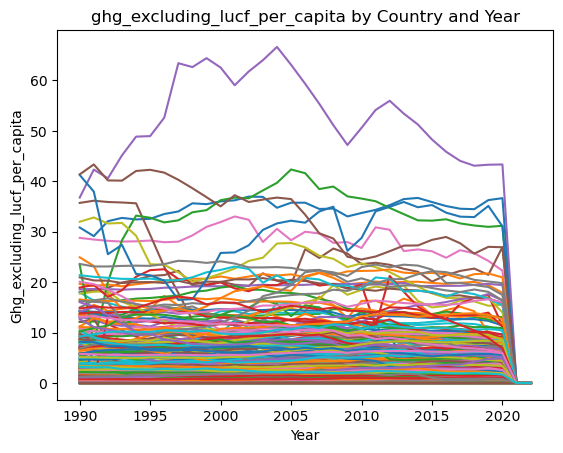

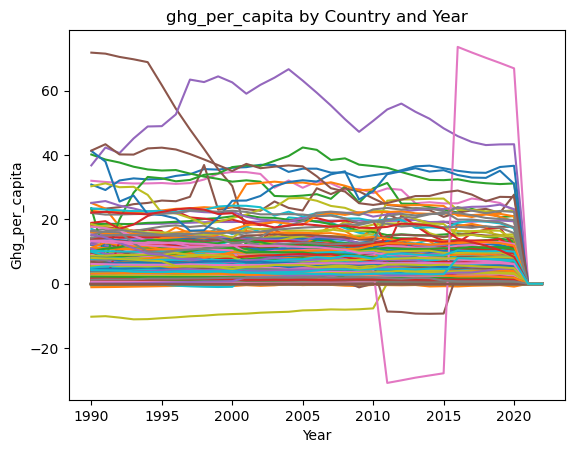

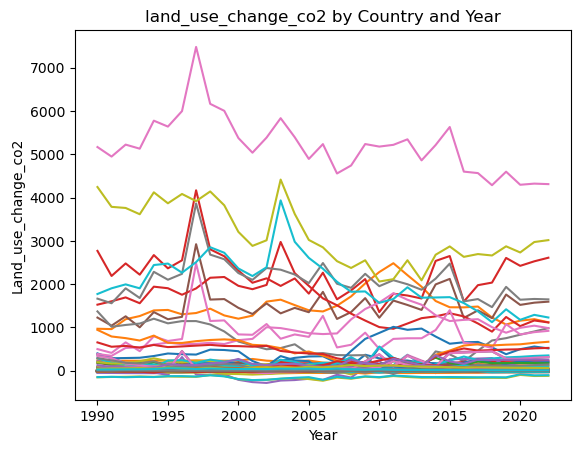

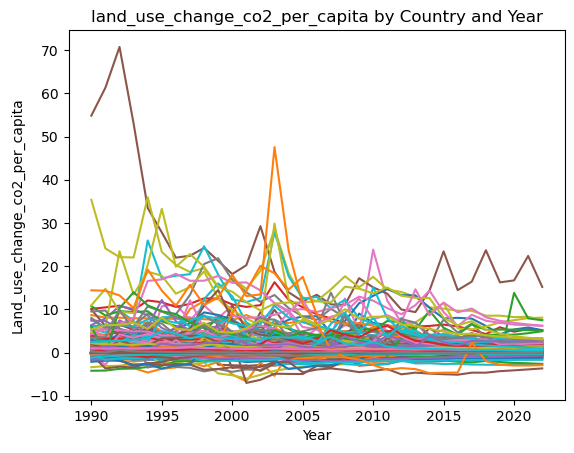

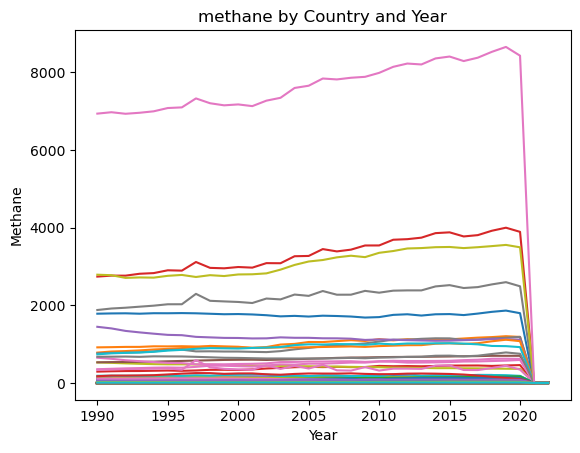

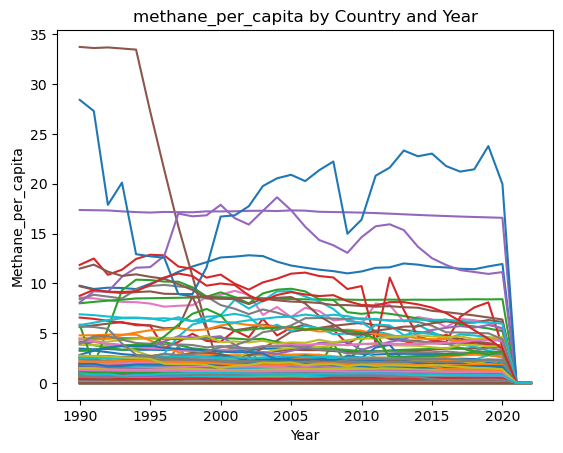

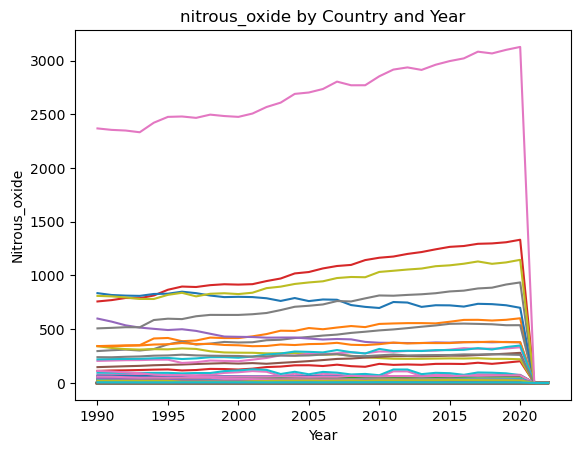

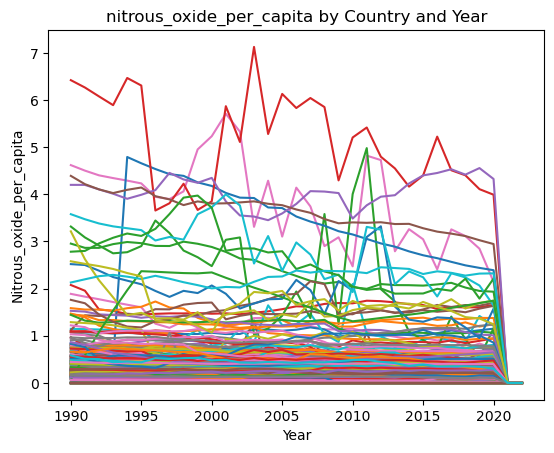

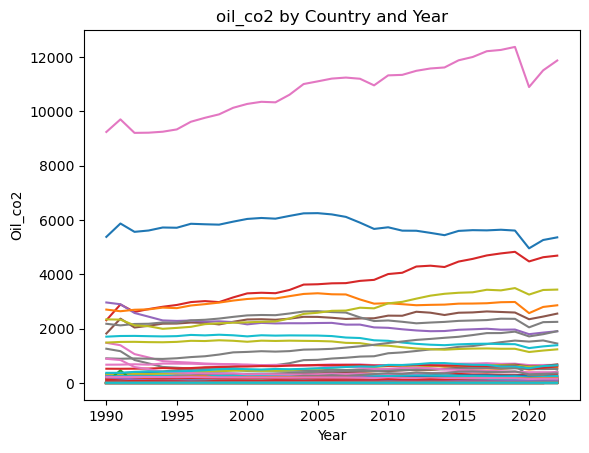

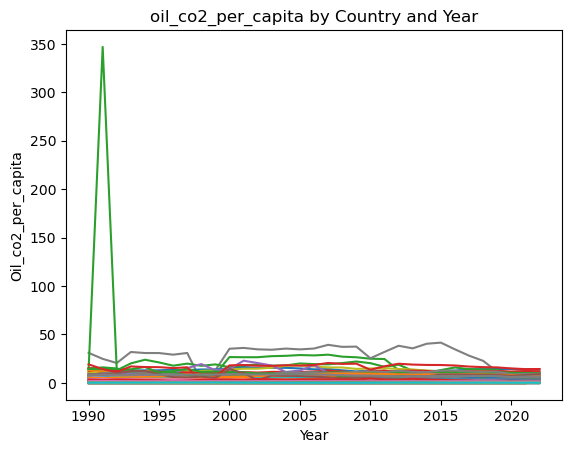

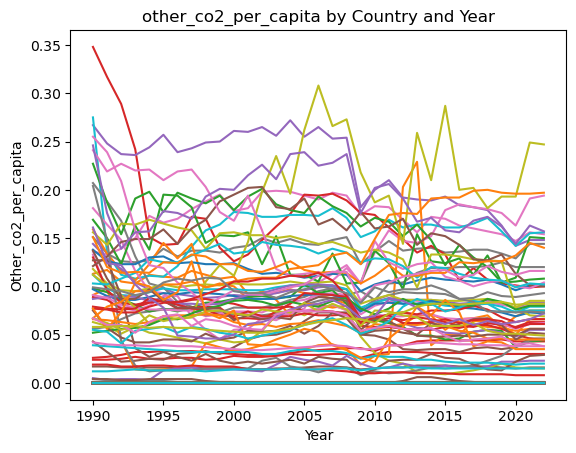

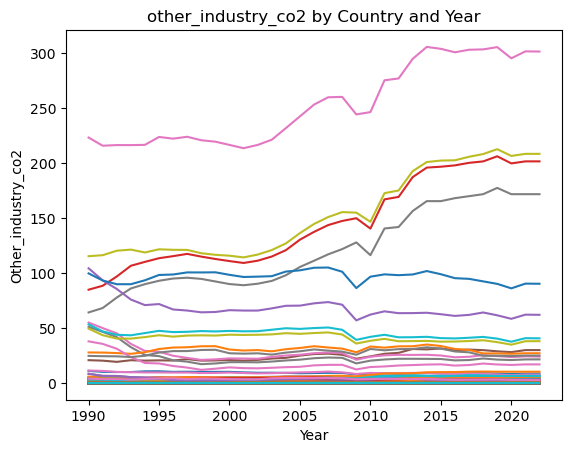

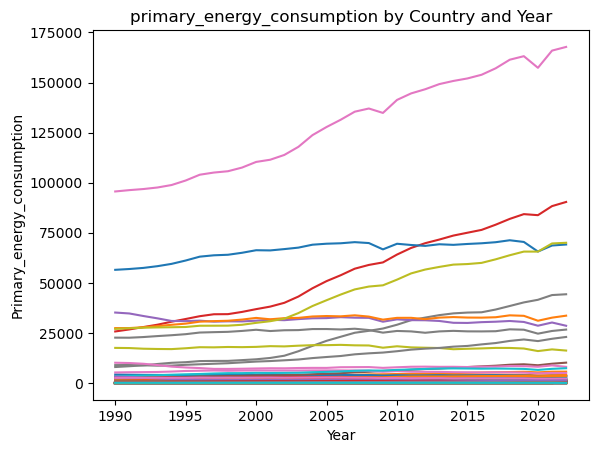

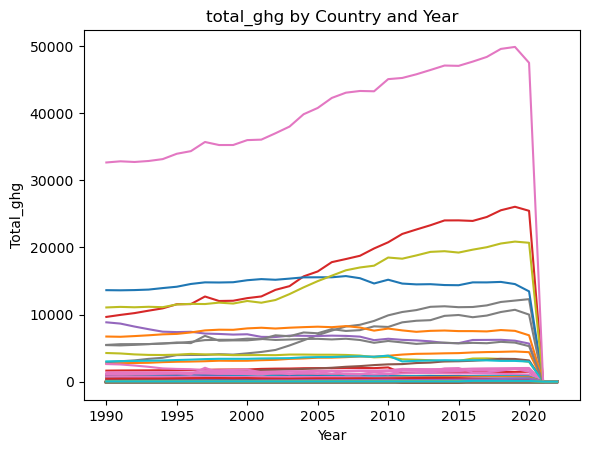

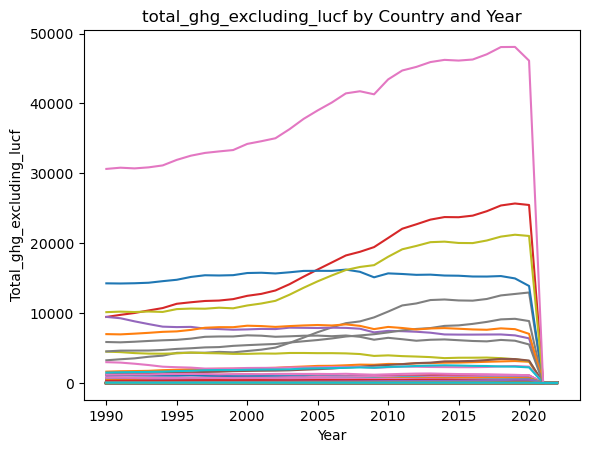

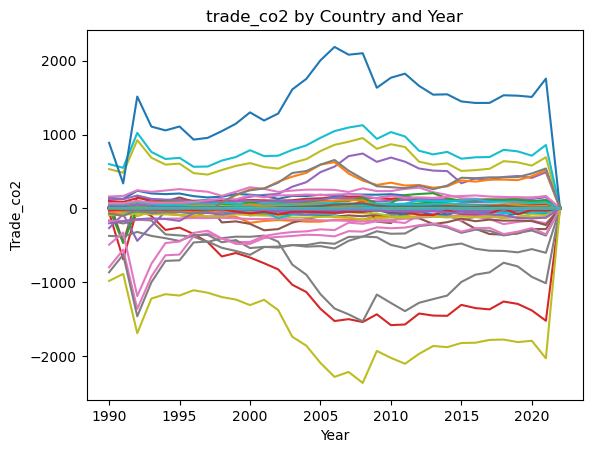

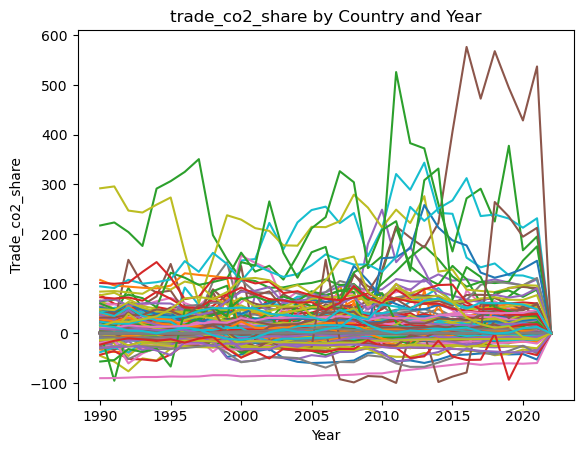

In [8]:
# Do the same for co2 stats and gdp
# ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
#        'cement_co2_per_capita', 'co2', 'co2_including_luc',
#        'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
#        'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
#        'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp',
#        'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita',
#        'consumption_co2', 'consumption_co2_per_capita',
#        'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
#        'cumulative_co2_including_luc', 'cumulative_coal_co2',
#        'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
#        'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
#        'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
#        'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
#        'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
#        'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
#        'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
#        'other_industry_co2', 'primary_energy_consumption', 'total_ghg',
#        'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share']
# All indexes of the gasses dataframe

def create_dataframe( column_to_track : str ) -> pd.DataFrame:
    grouped = filtered_gasses.groupby([ 'country', 'year' ])

    data = [ ]
    for name, group in grouped:
        country, year = name
        coldata = group[ column_to_track ].mean( )
        data.append(( year, country, coldata ))

    return pd.DataFrame( data, columns=[ 'Year', 'Country', column_to_track ]).pivot( index='Year', columns='Country', values=column_to_track )

def graph_gasses_dataframe( df : pd.DataFrame, name : str ):
    df.plot( kind='line' )
    plt.title( f'{ name } by Country and Year' )
    plt.xlabel( 'Year' )
    plt.ylabel( name.capitalize( ) )
    plt.legend( ).remove( )
    plt.show( )

gasses_yearly_data = {
    'population' : populations
}

# Population is index 4, so we want to start from gdp
for colname in gasses.columns[ 4: ]:
    gasses_yearly_data[ colname ] = create_dataframe( colname )
    print( f'Generated historical data for { colname }, access the dataframe with `gasses_yearly_data["{ colname }"]`' )
    
for name, df in gasses_yearly_data.items( ):
    graph_gasses_dataframe( df, name )
    

# Making the data useable

Some spikes in gdp, co2_per_capita, co2_per_gdp, oil_co2_per_capita

Features spiking interest or I think are useable: population, gdp, cement_co2, cement_co2_per_capita, co2, co2_including_luc (land-use change?), co2_per_capita, co2_per_gdp, coal_co2, energy_per_capita, energy_per_gdp (0 starting from 2018), gas_co2, gas_co2_per_capita, oil_co2, oil_co2_per_capita, other_co2_per_capita, primary_energy_consumption

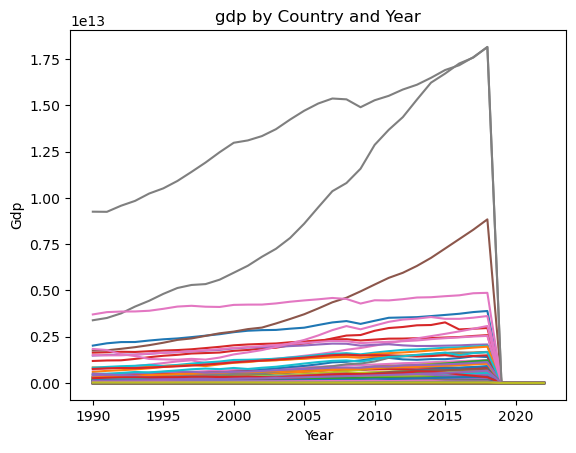

In [9]:
# gasses_yearly_data[ 'gdp' ].drop( 'World', inplace=True )
gasses_yearly_data[ 'gdp' ].drop( columns=[ 'World' ], inplace=True )
# issue: gdp is 0 for 95 countries
# print( gasses_yearly_data[ 'gdp' ].describe( ).loc[ 'max' ] )
graph_gasses_dataframe( gasses_yearly_data["gdp"], 'gdp' )

# weird influxes were caused by the world data

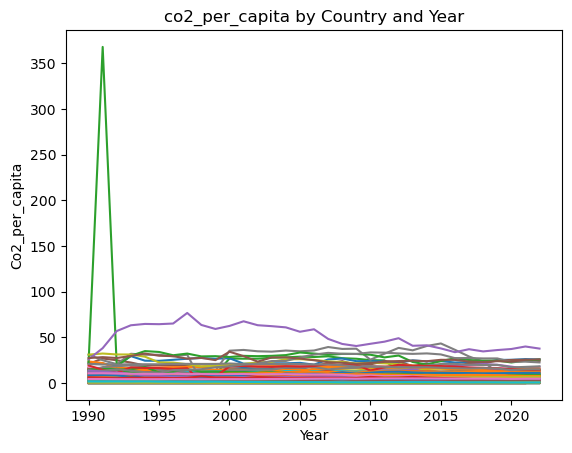

Country
Kuwait                                           367.928
Qatar                                             76.612
Curacao                                           43.211
United Arab Emirates                              34.138
Trinidad and Tobago                               33.406
                                                  ...   
Least developed countries (Jones et al. 2023)      0.000
Kuwaiti Oil Fires (Jones et al. 2023)              0.000
Ryukyu Islands (Jones et al. 2023)                 0.000
International transport                            0.000
Leeward Islands (Jones et al. 2023)                0.000
Name: max, Length: 260, dtype: float64


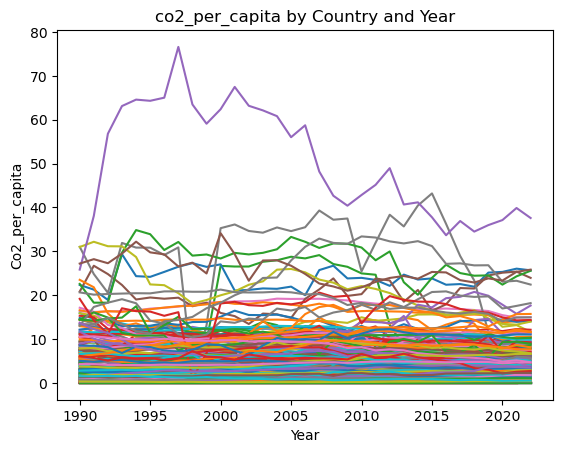

In [10]:
graph_gasses_dataframe( gasses_yearly_data["co2_per_capita"], 'co2_per_capita' )

print( gasses_yearly_data[ 'co2_per_capita' ].describe( ).loc[ 'max' ].sort_values( ascending=False ) )
# Kuwait is the anomaly with 357.928

# Median would make it too high
gasses_yearly_data[ 'co2_per_capita' ][ 'Kuwait' ].loc[ 1991 ] = gasses_yearly_data[ 'co2_per_capita' ][ 'Kuwait' ].loc[ 1992 ]

graph_gasses_dataframe( gasses_yearly_data["co2_per_capita"], 'co2_per_capita' )

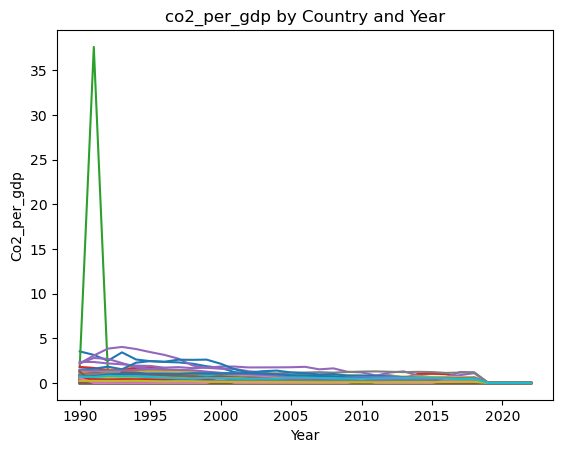

Country
Kuwait                                   37.608
Qatar                                     4.027
Bahrain                                   3.529
Mongolia                                  2.789
Turkmenistan                              2.609
                                          ...  
Panama Canal Zone (Jones et al. 2023)     0.000
Palau                                     0.000
Greenland                                 0.000
Grenada                                   0.000
Leeward Islands (Jones et al. 2023)       0.000
Name: max, Length: 260, dtype: float64


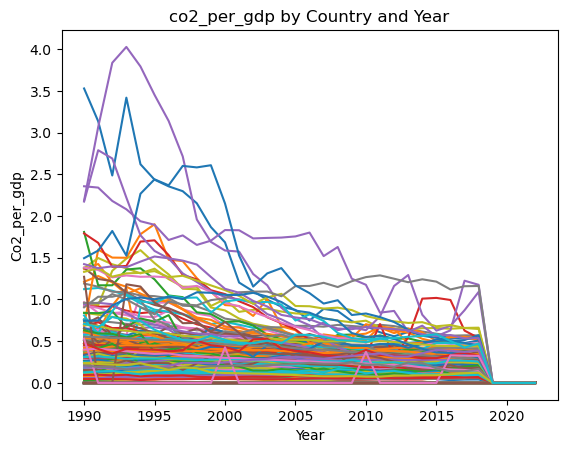

In [11]:
graph_gasses_dataframe( gasses_yearly_data["co2_per_gdp"], 'co2_per_gdp' )

print( gasses_yearly_data[ 'co2_per_gdp' ].describe( ).loc[ 'max' ].sort_values( ascending=False ) )

# Kuwait again with 37.608

gasses_yearly_data[ 'co2_per_gdp' ][ 'Kuwait' ].loc[ 1991 ] = gasses_yearly_data[ 'co2_per_gdp' ][ 'Kuwait' ].loc[ 1992 ]

graph_gasses_dataframe( gasses_yearly_data["co2_per_gdp"], 'co2_per_gdp' )

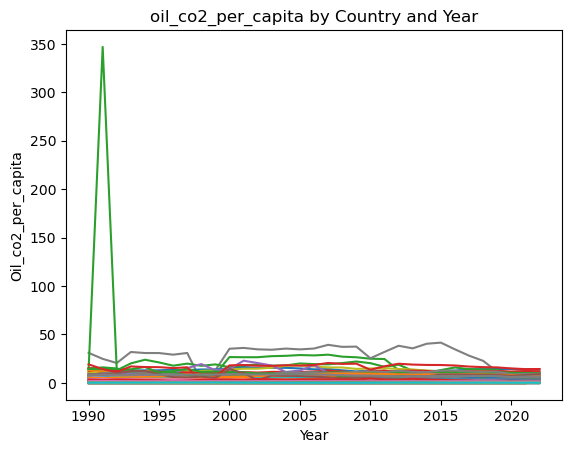

Country
Kuwait                                   346.792
Curacao                                   41.590
Aruba                                     29.146
Qatar                                     22.920
Sint Maarten (Dutch part)                 20.594
                                          ...   
Middle East (GCP)                          0.000
Kuwaiti Oil Fires (Jones et al. 2023)      0.000
Kuwaiti Oil Fires (GCP)                    0.000
International transport                    0.000
Leeward Islands (Jones et al. 2023)        0.000
Name: max, Length: 260, dtype: float64


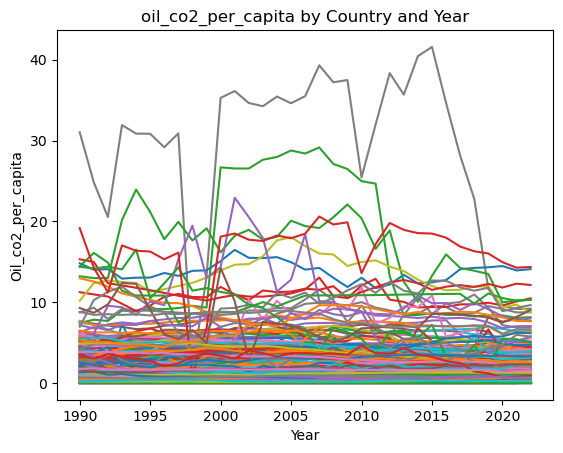

In [12]:
graph_gasses_dataframe( gasses_yearly_data["oil_co2_per_capita"], 'oil_co2_per_capita' )

print( gasses_yearly_data[ 'oil_co2_per_capita' ].describe( ).loc[ 'max' ].sort_values( ascending=False ) )

# Kuwait 346.792

gasses_yearly_data[ 'oil_co2_per_capita' ][ 'Kuwait' ].loc[ 1991 ] = gasses_yearly_data[ 'oil_co2_per_capita' ][ 'Kuwait' ].loc[ 1992 ]

graph_gasses_dataframe( gasses_yearly_data["oil_co2_per_capita"], 'oil_co2_per_capita' )

In [13]:
interesting_features = [ 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_including_luc', 'co2_per_capita', 'co2_per_gdp', 'coal_co2', 'energy_per_capita', 'energy_per_gdp', 'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita', 'primary_energy_consumption' ]

data = { }

first_feature = interesting_features[ 0 ]

base_dataset = gasses_yearly_data[ first_feature ]

keys_data = base_dataset.index
keys_for_each_year = base_dataset.columns

first_year = keys_data[ 0 ]

for year in keys_data:
    rotated = base_dataset.loc[ year ].transpose( )

    second_feature = interesting_features[ 1 ]
    year_data = gasses_yearly_data[ second_feature ].loc[ year ].transpose( )

    new_data = pd.merge( rotated, year_data, left_index=True, right_index=True )
    new_data.columns = ( 'population', 'gdp' )
    
    data[ year ] = new_data

for year in keys_data:
    for i in range( 2, len( interesting_features ) ):
        feature_name = interesting_features[ i ]
        new_data = pd.merge( new_data, gasses_yearly_data[ feature_name ].loc[ year ].transpose( ), left_index=True, right_index=True )
        new_data.rename( columns={ new_data.columns[ -1 ] : feature_name }, inplace=True )
    
    data[ year ] = new_data

for year in keys_data:
    display( year )
    display( data[ year ] )

# data is grouped by years, access by data[ year ],
# indexed by country with each column being a feature

1990

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                                   
Afghanistan           0.278           2968.316           2.430    0.403   
Africa              295.753           4086.444           0.000   75.954   
Africa (GCP)          0.000              0.000           0.000    0.000   
Albania               2.499          10214.598           2.599    0.465   
Algeria               2.942          12343.162           2.673   38.908   
...                     ...                ...             ...      ...   
Vietnam              11.058           1152.668           0.702    0.007   
Wallis and Futuna     0.000              0.000           0.000    0.000   
Yemen                 0.000           3518.467           1.046    0.000   
Zambia                0.832           4286.728           3.214    0.000   
Zimbabwe             13.418           6057.528           2.793    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                     0.038    1.271               0.119   
Africa                          0.119  243.024               0.381   
Africa (GCP)                    0.000    0.000               0.000   
Albania                         0.141    2.173               0.659   
Algeria                         1.525   23.204               0.909   
...                               ...      ...                 ...   
Vietnam                         0.000    9.116               0.136   
Wallis and Futuna               0.000    0.018               1.359   
Yemen                           0.000    9.175               0.686   
Zambia                          0.000    1.396               0.182   
Zimbabwe                        0.000    1.847               0.183   

                   other_co2_per_capita  primary_energy_consumption  
Country                                                              
Afg

1991

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.159     0.250   
Africa              295.753           4086.444  ...        0.480   306.648   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.458     1.480   
Algeria               2.942          12343.162  ...        0.651     2.689   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.184    11.998   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.191     0.000   
Zambia                0.832           4286.728  ...        0.227     0.839   
Zimbabwe             13.418           6057.528  ...        0.668    12.773   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                 1293.862           1.154    0.389   
Africa                      3976.666           0.000   78.466   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     8549.045           3.011    0.275   
Algeria                    11942.152           2.577   38.428   
...                              ...             ...      ...   
Vietnam                     1148.560           0.677    0.004   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3504.712           1.020    0.000   
Zambia                      4023.271           3.020    0.000   
Zimbabwe                    6036.091           2.701    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1992

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.117     0.022   
Africa              295.753           4086.444  ...        0.458   288.434   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.288     0.800   
Algeria               2.942          12343.162  ...        0.624     2.378   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.171    10.981   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.191     0.000   
Zambia                0.832           4286.728  ...        0.220     0.872   
Zimbabwe             13.418           6057.528  ...        0.791    13.513   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  760.342           0.723    0.363   
Africa                      3935.098           0.000   74.272   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     7468.515           2.821    0.198   
Algeria                    11971.857           2.502   31.932   
...                              ...             ...      ...   
Vietnam                     1229.321           0.684    0.000   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3536.721           0.989    0.000   
Zambia                      4027.771           2.947    0.000   
Zimbabwe                    5412.468           2.725    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1993

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.151     0.018   
Africa              295.753           4086.444  ...        0.473   318.584   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.243     0.600   
Algeria               2.942          12343.162  ...        0.629     1.924   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.169     8.896   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.161     0.000   
Zambia                0.832           4286.728  ...        0.217     0.883   
Zimbabwe             13.418           6057.528  ...        0.750    12.557   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  650.207           0.926    0.352   
Africa                      3847.371           0.000   81.721   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     6555.686           2.246    0.157   
Algeria                    10893.888           2.287   36.098   
...                              ...             ...      ...   
Vietnam                     1376.473           0.725    0.000   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2806.359           0.784    0.000   
Zambia                      3758.614           2.736    0.000   
Zimbabwe                    5147.958           2.596    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1994

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.184     0.015   
Africa              295.753           4086.444  ...        0.508   330.423   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.182     0.169   
Algeria               2.942          12343.162  ...        0.660     2.286   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.187    10.911   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.173     0.000   
Zambia                0.832           4286.728  ...        0.236     0.839   
Zimbabwe             13.418           6057.528  ...        0.742    13.553   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  570.403           1.113    0.338   
Africa                      3879.322           0.000   85.589   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     6243.837           1.941    0.099   
Algeria                    10807.210           2.248   37.386   
...                              ...             ...      ...   
Vietnam                     1509.568           0.747    0.000   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2561.124           0.696    0.000   
Zambia                      3649.358           3.046    0.000   
Zimbabwe                    4898.543           2.269    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1995

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.115     0.015   
Africa              295.753           4086.444  ...        0.519   346.584   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.180     0.161   
Algeria               2.942          12343.162  ...        0.667     1.935   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.188    12.549   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.183     0.000   
Zambia                0.832           4286.728  ...        0.199     0.330   
Zimbabwe             13.418           6057.528  ...        0.638    10.611   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  452.460           0.604    0.322   
Africa                      3936.807           0.000  101.556   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     6919.917           1.959    0.051   
Algeria                    10996.016           2.159   47.222   
...                              ...             ...      ...   
Vietnam                     1723.892           0.795    0.425   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2742.970           0.731    0.000   
Zambia                      3421.593           2.759    0.000   
Zimbabwe                    4794.385           2.236    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1996

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.114     0.007   
Africa              295.753           4086.444  ...        0.499   352.718   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.159     0.114   
Algeria               2.942          12343.162  ...        0.639     1.407   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.204    14.748   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.179     0.000   
Zambia                0.832           4286.728  ...        0.156     0.421   
Zimbabwe             13.418           6057.528  ...        0.570    10.497   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  425.906           0.604    0.308   
Africa                      3936.949           0.000  108.019   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     7645.640           1.965    0.044   
Algeria                    10692.724           1.979   50.567   
...                              ...             ...      ...   
Vietnam                     1945.025           0.837    0.627   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2674.420           0.703    0.000   
Zambia                      3175.215           2.397    0.000   
Zimbabwe                    4844.430           2.071    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1997

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.110     0.004   
Africa              295.753           4086.444  ...        0.486   360.178   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.135     0.044   
Algeria               2.942          12343.162  ...        0.537     1.381   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.242    21.528   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.183     0.000   
Zambia                0.832           4286.728  ...        0.187     0.484   
Zimbabwe             13.418           6057.528  ...        0.515     9.493   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  390.019           0.585    0.282   
Africa                      3922.852           0.000   95.206   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     7020.859           2.004    0.037   
Algeria                    10105.151           1.809   39.007   
...                              ...             ...      ...   
Vietnam                     2207.749           0.895    1.140   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2679.612           0.689    0.000   
Zambia                      3348.278           2.424    0.000   
Zimbabwe                    4702.475           1.978    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1998

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.109     0.004   
Africa              295.753           4086.444  ...        0.471   354.754   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.141     0.055   
Algeria               2.942          12343.162  ...        0.592     2.110   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.242    21.682   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.182     0.000   
Zambia                0.832           4286.728  ...        0.176     0.462   
Zimbabwe             13.418           6057.528  ...        0.505     9.732   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  365.121           0.577    0.264   
Africa                      3888.152           0.000  112.712   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     7602.231           1.971    0.033   
Algeria                    10304.176           1.713   54.641   
...                              ...             ...      ...   
Vietnam                     2354.646           0.918    1.898   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2819.064           0.704    0.000   
Zambia                      3194.412           2.312    0.000   
Zimbabwe                    4663.501           1.925    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

1999

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.095     0.004   
Africa              295.753           4086.444  ...        0.442   365.712   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.211     0.110   
Algeria               2.942          12343.162  ...        0.473     2.173   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.235    20.031   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.201     0.000   
Zambia                0.832           4286.728  ...        0.127     0.278   
Zimbabwe             13.418           6057.528  ...        0.565    10.600   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  350.347           0.586    0.242   
Africa                      3911.040           0.000  114.377   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     6892.834           1.563    0.029   
Algeria                    10262.746           1.612   50.920   
...                              ...             ...      ...   
Vietnam                     2407.067           0.911    2.158   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2057.448           0.509    0.000   
Zambia                      3018.763           2.079    0.000   
Zimbabwe                    5294.742           2.228    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2000

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.093     0.004   
Africa              295.753           4086.444  ...        0.432   369.186   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.199     0.070   
Algeria               2.942          12343.162  ...        0.409     1.960   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.246    20.716   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.202     0.000   
Zambia                0.832           4286.728  ...        0.119     0.289   
Zimbabwe             13.418           6057.528  ...        0.516    10.124   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  302.595           0.524    0.224   
Africa                      3902.278           0.000  114.350   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     9029.438           1.888    0.022   
Algeria                     9746.524           1.438   38.534   
...                              ...             ...      ...   
Vietnam                     2710.707           0.975    3.063   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3228.210           0.773    0.000   
Zambia                      2951.367           1.951    0.000   
Zimbabwe                    4919.522           2.175    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2001

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.097     0.070   
Africa              295.753           4086.444  ...        0.401   370.875   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.194     0.081   
Algeria               2.942          12343.162  ...        0.389     2.096   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.261    24.952   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.212     0.000   
Zambia                0.832           4286.728  ...        0.116     0.300   
Zimbabwe             13.418           6057.528  ...        0.467     9.538   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  236.892           0.423    0.209   
Africa                      3942.936           0.000  120.126   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     8635.532           1.644    0.015   
Algeria                     9961.640           1.391   41.029   
...                              ...             ...      ...   
Vietnam                     3032.469           1.035    2.565   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3380.405           0.802    0.000   
Zambia                      2997.712           1.882    0.000   
Zimbabwe                    4614.958           2.053    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2002

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.071     0.055   
Africa              295.753           4086.444  ...        0.367   360.040   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.215     0.084   
Algeria               2.942          12343.162  ...        0.370     2.609   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.279    27.490   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.198     0.000   
Zambia                0.832           4286.728  ...        0.112     0.304   
Zimbabwe             13.418           6057.528  ...        0.478     9.123   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  210.862           0.235    0.547   
Africa                      3895.799           0.000  134.355   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     9443.555           1.694    0.026   
Algeria                    10180.350           1.312   44.653   
...                              ...             ...      ...   
Vietnam                     3283.082           1.061    4.100   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3320.324           0.778    0.000   
Zambia                      3006.324           1.806    0.000   
Zimbabwe                    4561.243           2.198    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2003

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.074     0.092   
Africa              295.753           4086.444  ...        0.377   389.827   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.233     0.084   
Algeria               2.942          12343.162  ...        0.346     2.788   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.289    31.974   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.212     0.000   
Zambia                0.832           4286.728  ...        0.108     0.322   
Zimbabwe             13.418           6057.528  ...        0.506     8.183   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  229.968           0.247    0.466   
Africa                      3983.470           0.000  145.781   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    10756.612           1.802    0.026   
Algeria                    10510.461           1.232   44.027   
...                              ...             ...      ...   
Vietnam                     3502.004           1.069    5.206   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3707.222           0.859    0.000   
Zambia                      3019.908           1.697    0.000   
Zimbabwe                    4397.342           2.534    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2004

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.055     0.092   
Africa              295.753           4086.444  ...        0.370   416.583   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.213     0.084   
Algeria               2.942          12343.162  ...        0.309     1.924   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.310    34.792   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.221     0.000   
Zambia                0.832           4286.728  ...        0.099     0.239   
Zimbabwe             13.418           6057.528  ...        0.476     7.417   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  204.231           0.215    0.227   
Africa                      4171.311           0.000  152.687   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    11586.951           1.812    0.033   
Algeria                    10759.022           1.179   41.209   
...                              ...             ...      ...   
Vietnam                     4225.116           1.213    8.760   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3811.397           0.873    0.000   
Zambia                      3013.000           1.585    0.000   
Zimbabwe                    4045.232           2.485    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2005

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.074     0.106   
Africa              295.753           4086.444  ...        0.349   411.340   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.205     0.073   
Algeria               2.942          12343.162  ...        0.340     2.363   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.312    39.458   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.227     0.000   
Zambia                0.832           4286.728  ...        0.095     0.315   
Zimbabwe             13.418           6057.528  ...        0.580     8.475   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  252.069           0.242    0.330   
Africa                      4079.506           0.000  183.638   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    11545.616           1.685    0.022   
Algeria                    11113.723           1.121   61.211   
...                              ...             ...      ...   
Vietnam                     4447.702           1.204    9.394   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3906.308           0.871    0.000   
Zambia                      3068.174           1.509    0.000   
Zimbabwe                    4160.413           2.757    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2006

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.075     0.161   
Africa              295.753           4086.444  ...        0.332   417.527   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.177     0.073   
Algeria               2.942          12343.162  ...        0.306     2.700   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.304    42.744   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.241     0.000   
Zambia                0.832           4286.728  ...        0.085     0.132   
Zimbabwe             13.418           6057.528  ...        0.574     8.185   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  304.421           0.270    0.329   
Africa                      4054.325           0.000  179.343   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    10976.728           1.490    0.022   
Algeria                    11341.980           1.097   49.306   
...                              ...             ...      ...   
Vietnam                     4037.653           1.035   11.212   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3788.246           0.844    0.000   
Zambia                      3064.469           1.403    0.000   
Zimbabwe                    4158.782           2.842    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2007

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.081     0.747   
Africa              295.753           4086.444  ...        0.314   428.376   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.168     0.073   
Algeria               2.942          12343.162  ...        0.296     3.012   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.290    36.463   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.231     0.000   
Zambia                0.832           4286.728  ...        0.079     0.293   
Zimbabwe             13.418           6057.528  ...        0.553     7.808   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  354.280           0.266    0.308   
Africa                      4102.063           0.000  192.323   
Africa (GCP)                   0.000           0.000    0.000   
Albania                     9534.874           1.204    0.033   
Algeria                    11759.701           1.075   51.076   
...                              ...             ...      ...   
Vietnam                     4368.380           1.060   12.479   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3902.286           0.867    0.000   
Zambia                      2793.334           1.187    0.000   
Zimbabwe                    4036.720           2.828    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2008

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.116     1.078   
Africa              295.753           4086.444  ...        0.304   452.062   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.173     0.103   
Algeria               2.942          12343.162  ...        0.281     3.008   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.311    43.642   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.231     0.128   
Zambia                0.832           4286.728  ...        0.079     0.315   
Zimbabwe             13.418           6057.528  ...        0.513     5.955   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  607.833           0.439    0.297   
Africa                      4236.832           0.000  195.080   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    10499.328           1.216    0.015   
Algeria                    12252.297           1.071   51.551   
...                              ...             ...      ...   
Vietnam                     5341.395           1.243   13.901   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3976.890           0.879    0.000   
Zambia                      2786.650           1.105    0.000   
Zimbabwe                    3324.860           2.773    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2009

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.144     1.514   
Africa              295.753           4086.444  ...        0.286   421.882   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.166     0.388   
Algeria               2.942          12343.162  ...        0.284     1.594   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.322    45.489   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.244     0.238   
Zambia                0.832           4286.728  ...        0.081     0.407   
Zimbabwe             13.418           6057.528  ...        0.507     6.339   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  975.048           0.602    0.271   
Africa                      4198.256           0.000  191.714   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    11524.428           1.276    0.018   
Algeria                    12753.120           1.073   54.894   
...                              ...             ...      ...   
Vietnam                     5408.298           1.211   15.374   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       4277.224           0.937    0.736   
Zambia                      2734.891           0.998    0.000   
Zimbabwe                    3254.282           2.535    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2010

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.176     2.246   
Africa              295.753           4086.444  ...        0.274   427.883   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.173     0.429   
Algeria               2.942          12343.162  ...        0.263     1.216   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.341    47.463   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.218     0.451   
Zambia                0.832           4286.728  ...        0.075     0.381   
Zimbabwe             13.418           6057.528  ...        0.489     6.507   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                 1182.892           0.703    0.271   
Africa                      4217.788           0.000  201.908   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    12377.504           1.307    0.026   
Algeria                    12243.156           0.974   53.368   
...                              ...             ...      ...   
Vietnam                     6180.288           1.319   18.049   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       4030.759           0.844    1.946   
Zambia                      2768.134           0.920    0.000   
Zimbabwe                    3592.672           2.574    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2011

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.222     4.181   
Africa              295.753           4086.444  ...        0.274   420.703   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.187     0.535   
Algeria               2.942          12343.162  ...        0.260     1.048   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.352    59.547   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.218     0.462   
Zambia                0.832           4286.728  ...        0.075     0.267   
Zimbabwe             13.418           6057.528  ...        0.530     6.720   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                 1436.114           0.788    0.308   
Africa                      4143.733           0.000  221.727   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    10854.649           1.107    0.029   
Algeria                    12710.541           0.964   56.721   
...                              ...             ...      ...   
Vietnam                     6758.891           1.377   16.279   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3289.451           0.812    1.301   
Zambia                      2998.159           0.947    0.000   
Zimbabwe                    3860.790           2.572    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2012

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.170     3.125   
Africa              295.753           4086.444  ...        0.259   425.732   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.168     0.627   
Algeria               2.942          12343.162  ...        0.272     1.037   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.316    52.306   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.192     0.473   
Zambia                0.832           4286.728  ...        0.086     0.348   
Zimbabwe             13.418           6057.528  ...        0.538     6.995   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                 1324.121           0.682    0.308   
Africa                      4200.126           0.000  234.034   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    10652.809           1.068    0.029   
Algeria                    13624.909           1.020   64.114   
...                              ...             ...      ...   
Vietnam                     6990.851           1.368   17.957   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       2769.040           0.686    1.517   
Zambia                      3116.737           0.946    0.000   
Zimbabwe                    4106.950           2.605    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2013

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.147     3.327   
Africa              295.753           4086.444  ...        0.255   425.527   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.181     0.795   
Algeria               2.942          12343.162  ...        0.275     0.725   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.315    56.541   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.245     0.495   
Zambia                0.832           4286.728  ...        0.087     0.458   
Zimbabwe             13.418           6057.528  ...        0.553     7.104   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                 1060.793           0.531    0.297   
Africa                      4206.431           0.000  236.613   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    13392.774           1.327    0.033   
Algeria                    14130.735           1.049   65.450   
...                              ...             ...      ...   
Vietnam                     7305.416           1.371   18.719   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3797.829           0.923    2.012   
Zambia                      3198.529           0.955    0.000   
Zimbabwe                    4085.332           2.622    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2014

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.143     3.706   
Africa              295.753           4086.444  ...        0.259   439.206   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.202     1.029   
Algeria               2.942          12343.162  ...        0.285     0.546   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.357    78.073   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.239     0.495   
Zambia                0.832           4286.728  ...        0.091     0.484   
Zimbabwe             13.418           6057.528  ...        0.563     7.732   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  868.576           0.442    0.271   
Africa                      4210.886           0.000  239.099   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    11809.461           1.148    0.059   
Algeria                    15108.635           1.102   73.831   
...                              ...             ...      ...   
Vietnam                     7980.971           1.428   19.599   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       3495.329           0.874    1.854   
Zambia                      3323.385           0.979    0.000   
Zimbabwe                    3940.886           2.573    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2015

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.156     2.843   
Africa              295.753           4086.444  ...        0.246   417.184   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.155     0.322   
Algeria               2.942          12343.162  ...        0.290     0.502   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.396    97.816   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.176     0.414   
Zambia                0.832           4286.728  ...        0.092     0.495   
Zimbabwe             13.418           6057.528  ...        0.583     8.061   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  970.080           0.522    0.282   
Africa                      4204.125           0.000  253.874   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    11824.314           1.120    0.062   
Algeria                    15616.311           1.120   78.769   
...                              ...             ...      ...   
Vietnam                     8997.649           1.525   20.463   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       1837.103           0.656    1.894   
Zambia                      3115.068           0.921    0.000   
Zimbabwe                    3860.920           2.599    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2016

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.141     2.879   
Africa              295.753           4086.444  ...        0.247   424.010   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.147     0.191   
Algeria               2.942          12343.162  ...        0.276     0.000   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.386   106.855   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.139     0.323   
Zambia                0.832           4286.728  ...        0.104     0.854   
Zimbabwe             13.418           6057.528  ...        0.503     6.932   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  862.791           0.465    0.319   
Africa                      4205.953           0.000  269.761   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    13823.748           1.265    0.161   
Algeria                    15295.143           1.074   78.677   
...                              ...             ...      ...   
Vietnam                     9659.209           1.557   20.368   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       1432.552           0.581    0.986   
Zambia                      2846.699           0.843    0.000   
Zimbabwe                    3227.680           2.225    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2017

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.144     3.448   
Africa              295.753           4086.444  ...        0.240   417.888   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.162     0.275   
Algeria               2.942          12343.162  ...        0.284     0.795   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.372   108.222   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.141     0.308   
Zambia                0.832           4286.728  ...        0.117     1.903   
Zimbabwe             13.418           6057.528  ...        0.424     5.600   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  829.312           0.430    0.300   
Africa                      4207.816           0.000  284.410   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    12802.360           1.128    0.168   
Algeria                    15164.000           1.072   82.352   
...                              ...             ...      ...   
Vietnam                    10293.654           1.567   17.877   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       1288.877           0.565    0.590   
Zambia                      3202.072           0.945    0.000   
Zimbabwe                    3068.011           2.062    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2018

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...        0.160     3.847   
Africa              295.753           4086.444  ...        0.230   414.995   
Africa (GCP)          0.000              0.000  ...        0.000     0.000   
Albania               2.499          10214.598  ...        0.144     0.473   
Algeria               2.942          12343.162  ...        0.290     1.330   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...        0.390   122.121   
Wallis and Futuna     0.000              0.000  ...        0.000     0.000   
Yemen                 0.000           3518.467  ...        0.168     0.311   
Zambia                0.832           4286.728  ...        0.122     2.744   
Zimbabwe             13.418           6057.528  ...        0.472     6.097   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  924.251           0.502    0.293   
Africa                      4195.228           0.000  287.449   
Africa (GCP)                   0.000           0.000    0.000   
Albania                    14609.701           1.236    0.150   
Algeria                    15971.084           1.134   88.887   
...                              ...             ...      ...   
Vietnam                    11443.453           1.642   18.554   
Wallis and Futuna              0.000           0.000    0.000   
Yemen                       1170.726           0.522    0.198   
Zambia                      3494.537           1.022    0.000   
Zimbabwe                    3441.986           2.281    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2019

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...          0.0     3.955   
Africa              295.753           4086.444  ...          0.0   455.446   
Africa (GCP)          0.000              0.000  ...          0.0     0.000   
Albania               2.499          10214.598  ...          0.0     0.322   
Algeria               2.942          12343.162  ...          0.0     1.096   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...          0.0   191.443   
Wallis and Futuna     0.000              0.000  ...          0.0     0.000   
Yemen                 0.000           3518.467  ...          0.0     0.311   
Zambia                0.832           4286.728  ...          0.0     2.348   
Zimbabwe             13.418           6057.528  ...          0.0     5.571   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  802.613             0.0    0.246   
Africa                      4187.656             0.0  308.495   
Africa (GCP)                   0.000             0.0    0.000   
Albania                    11585.555             0.0    0.132   
Algeria                    16259.053             0.0   91.250   
...                              ...             ...      ...   
Vietnam                    12585.570             0.0   18.906   
Wallis and Futuna              0.000             0.0    0.000   
Yemen                       1475.985             0.0    0.198   
Zambia                      2983.882             0.0    0.000   
Zimbabwe                    3003.655             0.0    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2020

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...          0.0     4.400   
Africa              295.753           4086.444  ...          0.0   428.240   
Africa (GCP)          0.000              0.000  ...          0.0     0.000   
Albania               2.499          10214.598  ...          0.0     0.568   
Algeria               2.942          12343.162  ...          0.0     0.502   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...          0.0   215.817   
Wallis and Futuna     0.000              0.000  ...          0.0     0.000   
Yemen                 0.000           3518.467  ...          0.0     0.286   
Zambia                0.832           4286.728  ...          0.0     2.579   
Zimbabwe             13.418           6057.528  ...          0.0     4.309   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  702.888             0.0    0.154   
Africa                      3870.848             0.0  304.783   
Africa (GCP)                   0.000             0.0    0.000   
Albania                    11158.003             0.0    0.103   
Algeria                    14933.807             0.0   88.267   
...                              ...             ...      ...   
Vietnam                    12467.438             0.0   16.931   
Wallis and Futuna              0.000             0.0    0.000   
Yemen                       1092.002             0.0    0.256   
Zambia                      3099.083             0.0    0.000   
Zimbabwe                    2680.132             0.0    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2021

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...          0.0     4.527   
Africa              295.753           4086.444  ...          0.0   421.090   
Africa (GCP)          0.000              0.000  ...          0.0     0.000   
Albania               2.499          10214.598  ...          0.0     0.539   
Algeria               2.942          12343.162  ...          0.0     0.502   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...          0.0   211.893   
Wallis and Futuna     0.000              0.000  ...          0.0     0.000   
Yemen                 0.000           3518.467  ...          0.0     0.572   
Zambia                0.832           4286.728  ...          0.0     2.723   
Zimbabwe             13.418           6057.528  ...          0.0     4.548   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                  676.696             0.0    0.150   
Africa                      4027.117             0.0  335.593   
Africa (GCP)                   0.000             0.0    0.000   
Albania                    14100.432             0.0    0.113   
Algeria                    15914.461             0.0   97.323   
...                              ...             ...      ...   
Vietnam                    12375.912             0.0   13.757   
Wallis and Futuna              0.000             0.0    0.000   
Yemen                       1080.039             0.0    0.266   
Zambia                      3418.863             0.0    0.000   
Zimbabwe                    2635.154             0.0    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

2022

population  gdp  cement_co2  cement_co2_per_capita  \
Country                                                                   
Afghanistan        4.112877e+07  0.0       0.046                  0.004   
Africa             1.426737e+09  0.0      22.755                  0.036   
Africa (GCP)       0.000000e+00  0.0       0.000                  0.000   
Albania            2.842318e+06  0.0       0.384                  0.116   
Algeria            4.490323e+07  0.0       2.989                  0.117   
...                         ...  ...         ...                    ...   
Vietnam            9.818686e+07  0.0       1.117                  0.017   
Wallis and Futuna  1.159600e+04  0.0       0.000                  0.000   
Yemen              3.369661e+07  0.0       0.346                  0.026   
Zambia             2.001767e+07  0.0       0.179                  0.023   
Zimbabwe           1.632054e+07  0.0       0.287                  0.028   

                       co2  co2_including_luc  co2_per_capita  co2_per_gdp  \
Country                                                                      
Afghanistan          2.024              2.213           0.189        0.155   
Africa             658.281           1625.730           1.033        0.473   
Africa (GCP)       658.274              0.000           0.000        0.000   
Albania              5.521              7.287           1.675        0.426   
Algeria             76.738             88.881           3.007        0.651   
...                    ...                ...             ...          ...   
Vietnam             21.299             64.908           0.318        0.194   
Wallis and Futuna    0.018              0.000           1.359        0.000   
Yemen                9.520             12.516           0.712        0.212   
Zambia               2.407             43.682           0.313        0.235   
Zimbabwe            15.552             40.101           1.538        0.709   

                   coal_co2  energy_per_capita  ...  co2_per_gdp  coal_co2  \
Country                                         ...                          
Afghanistan           0.278           2968.316  ...          0.0     4.485   
Africa              295.753           4086.444  ...          0.0   401.602   
Africa (GCP)          0.000              0.000  ...          0.0     0.000   
Albania               2.499          10214.598  ...          0.0     0.529   
Algeria               2.942          12343.162  ...          0.0     0.502   
...                     ...                ...  ...          ...       ...   
Vietnam              11.058           1152.668  ...          0.0   201.102   
Wallis and Futuna     0.000              0.000  ...          0.0     0.000   
Yemen                 0.000           3518.467  ...          0.0     0.572   
Zambia                0.832           4286.728  ...          0.0     3.009   
Zimbabwe             13.418           6057.528  ...          0.0     5.027   

                   energy_per_capita  energy_per_gdp  gas_co2  \
Country                                                         
Afghanistan                    0.000             0.0    0.143   
Africa                      3943.844             0.0  322.712   
Africa (GCP)                   0.000             0.0    0.000   
Albania                        0.000             0.0    0.113   
Algeria                    15252.127             0.0   89.967   
...                              ...             ...      ...   
Vietnam                    12983.017             0.0   14.815   
Wallis and Futuna              0.000             0.0    0.000   
Yemen                          0.000             0.0    0.266   
Zambia                         0.000             0.0    0.000   
Zimbabwe                       0.000             0.0    0.000   

                   gas_co2_per_capita  oil_co2  oil_co2_per_capita  \
Country                                                              
Afghanistan                  

Cleaning HDI dataset and concatenating it to the one above

In [17]:
cols = list( development.columns )

# hdi_YEAR - human development index
# le_YEAR - life expectancy
# eys_YEAR - expected years of schooling
# mys_YEAR - mean years of schooling
# gni_pc_S_YEAR - gross national income per capita

development_using_columns = [ 'hdi_', 'le_', 'gni_pc_f_', 'gni_pc_m_' ]
development_using_columns = [ 'country' ] + [ f'{name}{year}' for name in development_using_columns for year in range( 1990, 2022 ) ]

drop_columns = list( set( cols ) - set( development_using_columns ) )

development_using = development.drop( columns=drop_columns )

for year in range( 1990, 2022 ):
    col1 = f'gni_pc_f_{ year }'
    col2 = f'gni_pc_m_{ year }'
    
    summa = development_using[ col1 ] + development_using[ col2 ]
    development_using[ f'gni_pc_{ year }' ] = summa
    
    development_using.drop( columns=[ col1, col2 ], inplace=True )

development_using.index = development_using[ 'country' ]

development_using.drop( columns=[ 'country' ], inplace=True )
development_using

concatenated_data = { }
for year in range( 1990, 2022 ):
    df_gasses = data[ year ]
    
    wanted_columns = [ f'hdi_{ year }', f'le_{ year }', f'gni_pc_{ year }' ]
    dropping_columns = list( set( development_using.columns ) - set( wanted_columns ) )
    
    concatenated_data[ year ] = pd.merge( df_gasses, development_using.drop( columns=dropping_columns ), left_index=True, right_index=True )
    
    concatenated_data[ year ].rename( columns={
        f'hdi_{ year }' : 'hdi',
        f'le_{ year }' : 'le',
        f'gni_pc_{ year }' : 'gni_pc'
    }, inplace=True )
    
concatenated_data[ 1990 ]
# country, hdi_YEAR

population  gdp  cement_co2  cement_co2_per_capita      co2  \
Afghanistan  41128772.0  0.0       0.046                  0.004    2.024   
Albania       2842318.0  0.0       0.384                  0.116    5.521   
Algeria      44903228.0  0.0       2.989                  0.117   76.738   
Andorra         79843.0  0.0       0.000                  0.000    0.407   
Angola       35588996.0  0.0       0.107                  0.009    5.090   
...                 ...  ...         ...                    ...      ...   
Uzbekistan   34627648.0  0.0       2.583                  0.126  103.783   
Vanuatu        326744.0  0.0       0.000                  0.000    0.066   
Yemen        33696612.0  0.0       0.346                  0.026    9.520   
Zambia       20017670.0  0.0       0.179                  0.023    2.407   
Zimbabwe     16320539.0  0.0       0.287                  0.028   15.552   

             co2_including_luc  co2_per_capita  co2_per_gdp  coal_co2  \
Afghanistan              2.213           0.189        0.155     0.278   
Albania                  7.287           1.675        0.426     2.499   
Algeria                 88.881           3.007        0.651     2.942   
Andorra                  0.421           7.589        0.000     0.000   
Angola                  30.224           0.430        0.443     0.000   
...                        ...             ...          ...       ...   
Uzbekistan             103.205           5.043        0.745     7.355   
Vanuatu                  2.239           0.437        0.000     0.000   
Yemen                   12.516           0.712        0.212     0.000   
Zambia                  43.682           0.313        0.235     0.832   
Zimbabwe                40.101           1.538        0.709    13.418   

             energy_per_capita  energy_per_gdp  gas_co2  gas_co2_per_capita  \
Afghanistan           2968.316           2.430    0.403               0.038   
Albania              10214.598           2.599    0.465               0.141   
Algeria              12343.162           2.673   38.908               1.525   
Andorra                  0.000           0.000    0.000               0.000   
Angola                1972.415           2.032    1.011               0.085   
...                        ...             ...      ...                 ...   
Uzbekistan           25312.494           3.737   63.186               3.070   
Vanuatu               3206.816           0.000    0.000               0.000   
Yemen                 3518.467           1.046    0.000               0.000   
Zambia                4286.728           3.214    0.000               0.000   
Zimbabwe              6057.528           2.793    0.000               0.000   

             oil_co2  oil_co2_per_capita  other_co2_per_capita  \
Afghanistan    1.271               0.119                   0.0   
Albania        2.173               0.659                   0.0   
Algeria       23.204               0.909                   0.0   
Andorra        0.407               7.589                   0.0   
Angola         2.475               0.209                   0.0   
...              ...                 ...                   ...   
Uzbekistan    29.244               1.421                   0.0   
Vanuatu        0.066               0.437                   0.0   
Yemen          9.175               0.686                   0.0   
Zambia         1.396               0.182                   0.0   
Zimbabwe       1.847               0.183                   0.0   

             primary_energy_consumption    hdi       le        gni_pc  
Afghanistan                      31.746  0.273  45.9672   5368.354275  
Albania                          33.658  0.647  73.1439   9432.844715  
Algeria                         314.974  0.591  67.4160  16801.499602  
Andorra                           0.000    NaN  78.4063           NaN  
Angola                           23.331    NaN  41.8933   9715.157482  
...                                 ...    ...   

In [15]:
air.columns

replace = {
    'WHO Country Name' : 'country',
    'Measurement Year' : 'year',
    'PM2.5 (μg/m3)' : 'PM2.5',
    'PM10 (μg/m3)' : 'PM10',
    'NO2 (μg/m3)' : 'NO2',
    'PM25 temporal coverage (%)' : 'PM25%',
    'PM10 temporal coverage (%)' : 'PM10%',
    'NO2 temporal coverage (%)' : 'NO2%'
}

air.rename( columns=replace, inplace=True )
air # issue: air quality is ttaken from different cities, years arent increasing gradually

ISO3       country City or Locality  year   PM2.5   PM10    NO2  PM25%  \
0      AFG   Afghanistan            Kabul  2019  119.77    NaN    NaN   18.0   
1      ALB       Albania           Durres  2015     NaN  17.65  26.63    NaN   
2      ALB       Albania           Durres  2016   14.32  24.56  24.78    NaN   
3      ALB       Albania          Elbasan  2015     NaN    NaN  23.96    NaN   
4      ALB       Albania          Elbasan  2016     NaN    NaN  26.26    NaN   
...    ...           ...              ...   ...     ...    ...    ...    ...   
32186  ZAF  South Africa       West Coast  2015    7.47  24.64   7.64   75.0   
32187  ZAF  South Africa       West Coast  2016    8.42  33.28   7.27   75.0   
32188  ZAF  South Africa       West Coast  2017    6.83  20.49   8.72   75.0   
32189  ZAF  South Africa       West Coast  2018    6.10  17.99   7.15   75.0   
32190  ZAF  South Africa        West Rand  2016     NaN    NaN  17.85    NaN   

       PM10%       NO2%  Version of the database  
0        NaN        NaN                     2022  
1        NaN  83.961187                     2022  
2        NaN  87.932605                     2022  
3        NaN  97.853881                     2022  
4        NaN  96.049636                     2022  
...      ...        ...                      ...  
32186   75.0  75.000000                     2022  
32187   75.0  75.000000                     2022  
32188   75.0  75.000000                     2022  
32189   75.0  75.000000                     2022  
32190    NaN  75.000000                     2022  

[32191 rows x 11 columns]